# **CheckPoint 1**


Importo las librerías que voy a utilizar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #Z-score

Leo el archivo csv, *'hotels_train'*

In [ ]:
hoteles_tr = pd.read_csv("hotels_train.csv")
hoteles_ts = pd.read_csv("hotels_test.csv")

# **Primera Parte: Exploración Inicial**

Analizo cada variable

Tipos:

In [ ]:
hoteles_filtrado = hoteles_tr.copy()
hotel_city = hoteles_tr[hoteles_tr['hotel']=='City Hotel']
hotel_resort = hoteles_tr[hoteles_tr['hotel']=='Resort Hotel']

In [ ]:
hoteles_tr.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

Como se observa las diferentes features son de distintos tipos. Por lo tanto, definimos el tipo de dato para las siguientes variables y así poder facilitar algunos cálculos y gráficos

In [ ]:
hoteles_tr['hotel'] = hoteles_tr['hotel'].astype('string')
hoteles_tr['arrival_date_month'] = hoteles_tr['arrival_date_month'].astype('string')
hoteles_tr['meal'] = hoteles_tr['meal'].astype('string')
hoteles_tr['country'] = hoteles_tr['country'].astype('string')
hoteles_tr['market_segment'] = hoteles_tr['market_segment'].astype('string')
hoteles_tr['distribution_channel'] = hoteles_tr['distribution_channel'].astype('string')
hoteles_tr['reserved_room_type'] = hoteles_tr['reserved_room_type'].astype('string')
hoteles_tr['assigned_room_type'] = hoteles_tr['assigned_room_type'].astype('string')
hoteles_tr['deposit_type'] = hoteles_tr['deposit_type'].astype('string')
hoteles_tr['customer_type'] = hoteles_tr['customer_type'].astype('string')
hoteles_tr['id'] = hoteles_tr['id'].astype('string')

In [ ]:
print("El tamaño del dataset train es:", hoteles_tr.shape)

El tamaño del dataset train es: (61913, 31)


In [ ]:
hoteles_tr.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


**Variables cuantitativas:**

Calculo las siguientes medidas,
  * Media
  * Mediana
  * Moda
  * Primer y tercer cuartil


Las variables cuantitativas utilizadas son:
* lead_time
* arrival_date_year
* arrival_date_week_number
* arrival_date_day_of_month
* stays_in_weekend_nights
* stays_in_week_nights
* adults
* children
* babies
* previous_cancellation
* previous_bookings_not_canceled
* booking_changes
* days_in_waiting_list
* adr
* total_of_special_requests


Saco is_repeated_guest, agent, required_car_parking_spaces, is_canceled

In [ ]:

variables_cuantitativas = ["lead_time","arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","previous_cancellations","previous_bookings_not_canceled","booking_changes","days_in_waiting_list","adr","total_of_special_requests"]
valores_cuantitativos = hoteles_tr.loc[:,variables_cuantitativas]
hoteles_cuantitativos = pd.DataFrame()
hoteles_cuantitativos["media"] = valores_cuantitativos.mean()
hoteles_cuantitativos["mediana"] = valores_cuantitativos.median()
hoteles_cuantitativos["moda"] = valores_cuantitativos.mode().iloc[0]
hoteles_cuantitativos["1º cuartil"] = valores_cuantitativos.quantile([0.25]).iloc[0]
hoteles_cuantitativos["3º cuartil"] = valores_cuantitativos.quantile([0.75]).iloc[0]
hoteles_cuantitativos["rango"] = (valores_cuantitativos.max()-valores_cuantitativos.min())


hoteles_cuantitativos


,media,mediana,moda,1º cuartil,3º cuartil,rango
lead_time,112.248187,78.0,0.0,23.0,172.0,629.00
arrival_date_year,2016.154749,2016.0,2016.0,2016.0,2017.0,2.00
arrival_date_week_number,27.218080,28.0,33.0,16.0,38.0,52.00
arrival_date_day_of_month,15.785812,16.0,17.0,8.0,23.0,30.00
stays_in_weekend_nights,0.924135,1.0,0.0,0.0,2.0,16.00
stays_in_week_nights,2.510054,2.0,2.0,1.0,3.0,40.00
adults,1.862791,2.0,2.0,2.0,2.0,55.00
children,0.104896,0.0,0.0,0.0,0.0,10.00
babies,0.007155,0.0,0.0,0.0,0.0,9.00
previous_cancellations,0.114790,0.0,0.0,0.0,0.0,26.00


**Variables cualitativas:**

Reportamos los posibles valores que toman en cada categoría y que tan frecuente lo hacen

Las variables cualitativas son:
* hotel
* arrival_date_month
* meal
* country
* market_segment
* distribution_channel
* is_repeated_guest
* reserved_room_type
* assigned_room_type
* deposit_type
* customer_type
* agent
* company
* required_car_parking_spaces
* id
* is_canceled

In [ ]:
variables_cualitativas = ["hotel","arrival_date_month","meal","country","market_segment","distribution_channel","is_repeated_guest","reserved_room_type","assigned_room_type","deposit_type","customer_type","agent","company","required_car_parking_spaces","id","is_canceled"]
valores_cualitativos = hoteles_tr.loc[:,variables_cualitativas]

In [ ]:
print('Posibles valores de cada categoría')
cantidad_de_valores = valores_cualitativos.nunique()
cantidad_de_valores

Posibles valores de cada categoría


hotel                              2
arrival_date_month                12
meal                               5
country                          149
market_segment                     8
distribution_channel               5
is_repeated_guest                  2
reserved_room_type                10
assigned_room_type                12
deposit_type                       3
customer_type                      4
agent                            296
company                          276
required_car_parking_spaces        5
id                             61913
is_canceled                        2
dtype: int64

Vemos la frecuencia en cada una de las categorías en una medida de porcentaje

In [ ]:
print('Hotel:')
valores_cualitativos.hotel.value_counts(normalize=True)*100

Hotel:


City Hotel      68.045483
Resort Hotel    31.954517
Name: hotel, dtype: Float64

In [ ]:
print('Mes de llegada:')
valores_cualitativos.arrival_date_month.value_counts(normalize=True)*100

Mes de llegada:


August       11.590458
July         10.537367
May            9.94783
April         9.493967
October        9.46974
June          9.322759
September     9.075638
March         7.912716
February      6.662575
December      5.641788
November      5.498038
January       4.847124
Name: arrival_date_month, dtype: Float64

In [ ]:
print('Comida:')
valores_cualitativos.meal.value_counts(normalize=True)*100

Comida:


BB           77.264872
HB           12.036244
SC            8.973883
Undefined     0.954565
FB            0.770436
Name: meal, dtype: Float64

In [ ]:
print('País:')
valores_cualitativos.country.value_counts(normalize=True)*100

País:


PRT    45.305712
GBR     9.292939
FRA     7.795176
ESP     6.824224
DEU     5.368605
         ...    
SDN     0.001621
NAM     0.001621
MCO     0.001621
STP     0.001621
RWA     0.001621
Name: country, Length: 149, dtype: Float64

In [ ]:
print('Segmento del Mercado:')
valores_cualitativos.market_segment.value_counts(normalize=True)*100

Segmento del Mercado:


Online TA        47.274401
Offline TA/TO    20.002261
Groups           18.647134
Direct            9.298532
Corporate         4.012081
Complementary     0.579846
Aviation          0.182514
Undefined          0.00323
Name: market_segment, dtype: Float64

In [ ]:
print('Es un huésped repetido:')
valores_cualitativos.is_repeated_guest.value_counts(normalize=True)*100

Es un huésped repetido:


0    97.200911
1     2.799089
Name: is_repeated_guest, dtype: float64

In [ ]:
print('Canal de Distribución:')
valores_cualitativos.distribution_channel.value_counts(normalize=True)*100

Canal de Distribución:


TA/TO        83.744932
Direct       10.981539
Corporate     5.123318
GDS            0.14375
Undefined     0.006461
Name: distribution_channel, dtype: Float64

In [ ]:
print('Tipo de Habitación Reservada:')
valores_cualitativos.reserved_room_type.value_counts(normalize=True)*100

Tipo de Habitación Reservada:


A    72.899068
D    15.481401
E     5.247686
F     2.343611
G     1.760535
B     0.936798
C     0.778512
H     0.539467
P     0.011306
L     0.001615
Name: reserved_room_type, dtype: Float64

In [ ]:
print('Tipo de Déposito:')
valores_cualitativos.deposit_type.value_counts(normalize=True)*100

Tipo de Déposito:


No Deposit    83.480045
Non Refund    16.393972
Refundable     0.125983
Name: deposit_type, dtype: Float64

In [ ]:
print("Agente")
valores_cualitativos.agent.value_counts(normalize=True)*100

Agente


9.0      31.475483
240.0    13.671955
1.0       8.189105
14.0      3.146808
6.0       3.033893
           ...    
420.0     0.001851
352.0     0.001851
450.0     0.001851
283.0     0.001851
25.0      0.001851
Name: agent, Length: 296, dtype: float64

In [ ]:
print('Tipo de Cliente:')
valores_cualitativos.customer_type.value_counts(normalize=True)*100

Tipo de Cliente:


Transient          76.638186
Transient-Party    19.653385
Contract             3.28364
Group                0.42479
Name: customer_type, dtype: Float64

In [ ]:
print("Company")
valores_cualitativos.company.value_counts(normalize=True)*100

Company


40.0     12.373096
223.0    11.548223
67.0      5.361675
45.0      3.743655
153.0     3.362944
           ...    
305.0     0.031726
275.0     0.031726
461.0     0.031726
220.0     0.031726
160.0     0.031726
Name: company, Length: 276, dtype: float64

In [ ]:
print("Requiere estacionamiento")
valores_cualitativos.required_car_parking_spaces.value_counts(normalize=True)*100

Requiere estacionamiento


0    95.038199
1     4.939189
2     0.019382
8     0.001615
3     0.001615
Name: required_car_parking_spaces, dtype: float64

In [ ]:
print("id")
valores_cualitativos.id.value_counts(normalize=True)*100

id


7aa4cc6b-b92c-4061-b21d-4f9e0cac4689    0.001615
c1575fb1-cd0c-47a7-813c-09d2e762a15a    0.001615
1f0b411b-9ade-4dab-b601-fb360731602a    0.001615
9373901b-5a8d-4f4e-acb4-6824c5ebc1e1    0.001615
2226c018-ea20-4c4e-8f71-ea66aee70d7c    0.001615
                                          ...   
8a4d1423-1343-4e9f-a6df-68adf4d173bf    0.001615
8442e317-2c5d-4751-a664-17c12d9fa9ba    0.001615
32bffef5-5404-4e86-9f39-fd2282e1ad7f    0.001615
cc922a1c-356e-42a5-a984-0b1af03c2f5c    0.001615
7137e599-4442-41fb-b147-4aba9f344e38    0.001615
Name: id, Length: 61913, dtype: Float64

In [ ]:
print("Cancelo")
valores_cualitativos.is_canceled.value_counts(normalize=True)*100

Cancelo


0    50.025035
1    49.974965
Name: is_canceled, dtype: float64

#**Vemos si existen variables que sean irrelevantes para el análisis**

La variable "id" no nos aporta nada a nuestro análisis ya que solamente nos otorga una manera de identificar a los distintos huespedes sin aportar información sobre ellos.

In [ ]:
hoteles_tr.drop('id', axis = 1,  inplace=True)  #Elimina columna sobre el mismo dataframe
hoteles_tr.shape

(61913, 30)

La variable 'arrival_date_week_number' nos dice el numero de la semana que llega el huesped. Teniendo la variable 'arrival_day_date_of_month', la variable que nos muestra el numero de la semana pasa a ser inutil. Por eso decidimos tambien eliminarla del dataset.

In [ ]:
hoteles_tr.drop('arrival_date_week_number', axis = 1,  inplace=True)  #Elimina columna sobre el mismo dataframe
hoteles_tr.shape

(61913, 29)

#**Realizar un análisis gráfico de las distribuciones de las variables cuantitativas**

En esta parte haremos un analisis grafico de las variables cuantitativas para obtener un plano general de las reservas.



Empezamos analizando la cantidad de reservas con las variables temporales



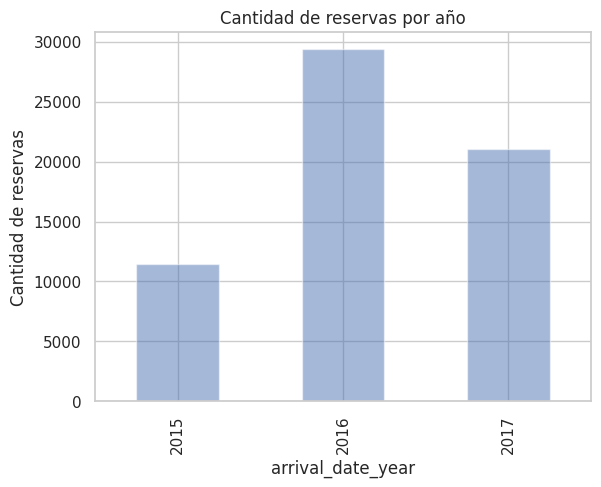

In [ ]:
total_de_reservas = hoteles_tr.shape[0]
Cant_por_anio = hoteles_tr["arrival_date_year"].value_counts().sort_index().plot.bar(alpha=0.5, title="Cantidad de reservas por año", xlabel="arrival_date_year",ylabel="Cantidad de reservas")

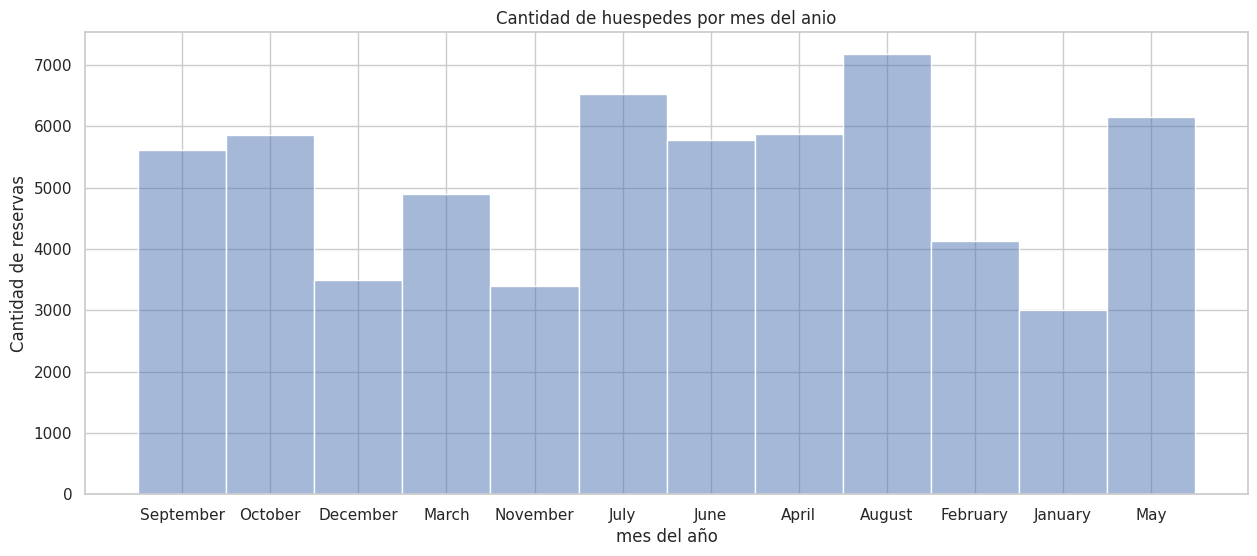

In [ ]:

plt.figure(figsize=(15,6))
sns_hist=sns.histplot(data=hoteles_tr['arrival_date_month'], alpha = 0.5).set(title="Cantidad de huespedes por mes del anio",xlabel="mes del año",ylabel="Cantidad de reservas")

Observamos que en 2016 se triplico la cantida de reservas con respecto al año 2015, y en 2017 hubo una caida del 30% de reservas.

Del mismo modo, vemos que las reservas se concentran en los meses de agosto y julio.

Podemos analisar tambien la cantidad adultos, menores y bebes que asisten.

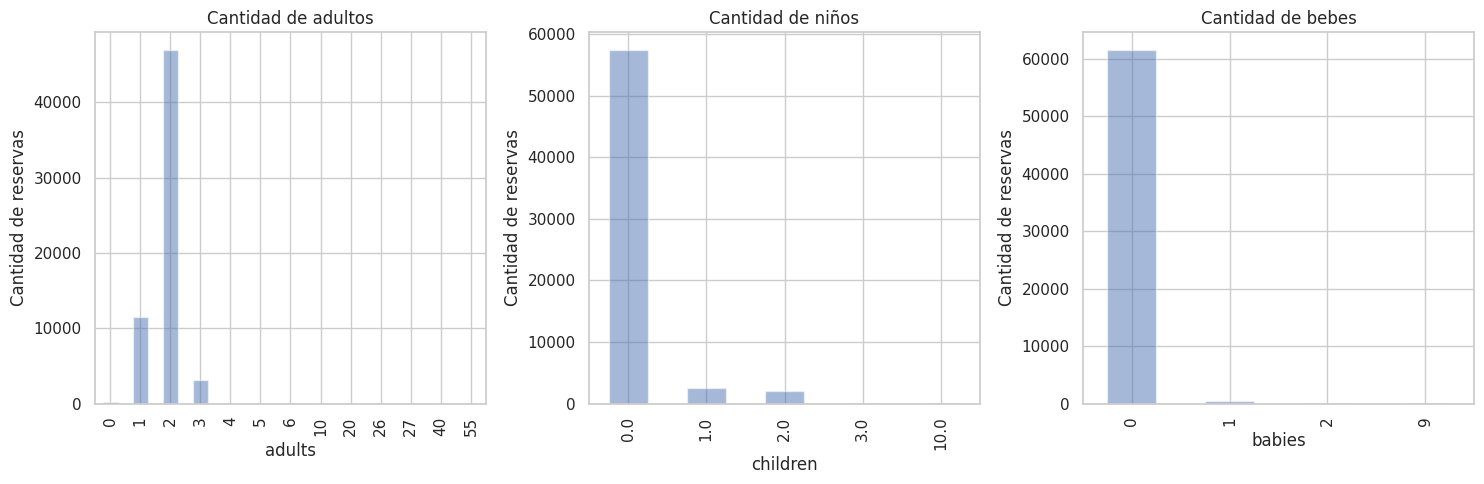

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

hoteles_tr["adults"].value_counts().sort_index().plot.bar(alpha=0.5, title="Cantidad de adultos", xlabel="adults", ylabel="Cantidad de reservas", ax=axes[0])
hoteles_tr["children"].value_counts().sort_index().plot.bar(alpha=0.5, title="Cantidad de niños", xlabel="children", ylabel="Cantidad de reservas", ax=axes[1])
hoteles_tr["babies"].value_counts().sort_index().plot.bar(alpha=0.5, title="Cantidad de bebes", xlabel="babies", ylabel="Cantidad de reservas", ax=axes[2])

plt.tight_layout()
plt.show()

Podemos observar que en la mayoria de las reservas hay 2 adultos.

Vemos que para los niños y bebes, casi todas las reservas son solo adultos. Ajustamos los graficos para ver la cantida de ninios y bebes en reservas.

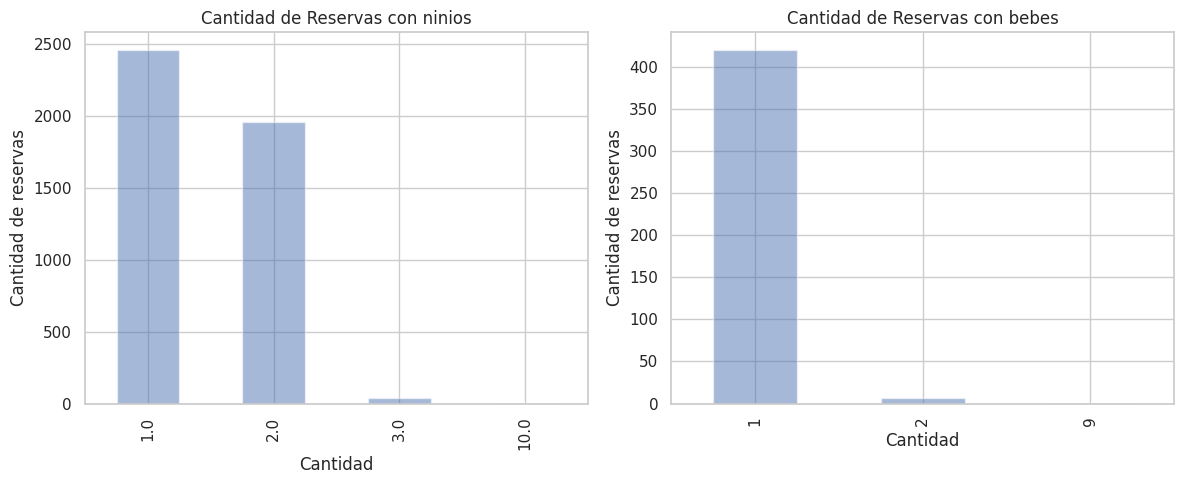

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cant_ninios_mayor_a_cero = hoteles_tr[hoteles_tr["children"] > 0]["children"]
cant_ninios_mayor_a_cero.value_counts().sort_index().plot.bar(alpha=0.5, title="Cantidad de Reservas con ninios", xlabel="Cantidad", ylabel="Cantidad de reservas", ax=axes[0])

cant_bebes_mayor_a_cero = hoteles_tr[hoteles_tr["babies"] > 0]["babies"]
cant_bebes_mayor_a_cero.value_counts().sort_index().plot.bar(alpha=0.5, title="Cantidad de Reservas con bebes", xlabel="Cantidad", ylabel="Cantidad de reservas", ax=axes[1])

plt.tight_layout()

plt.show()

# **Analizamos las correlaciones existentes entre las variables**

Ahora realizamos un HeatMap para poder visualizar todas las correlaciones.

<ipython-input-697-b2c73d5bf818>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grf=sns.heatmap(hoteles_tr.corr(), annot=True, linewidths=1.5, fmt =".2f", cmap = 'Blues')


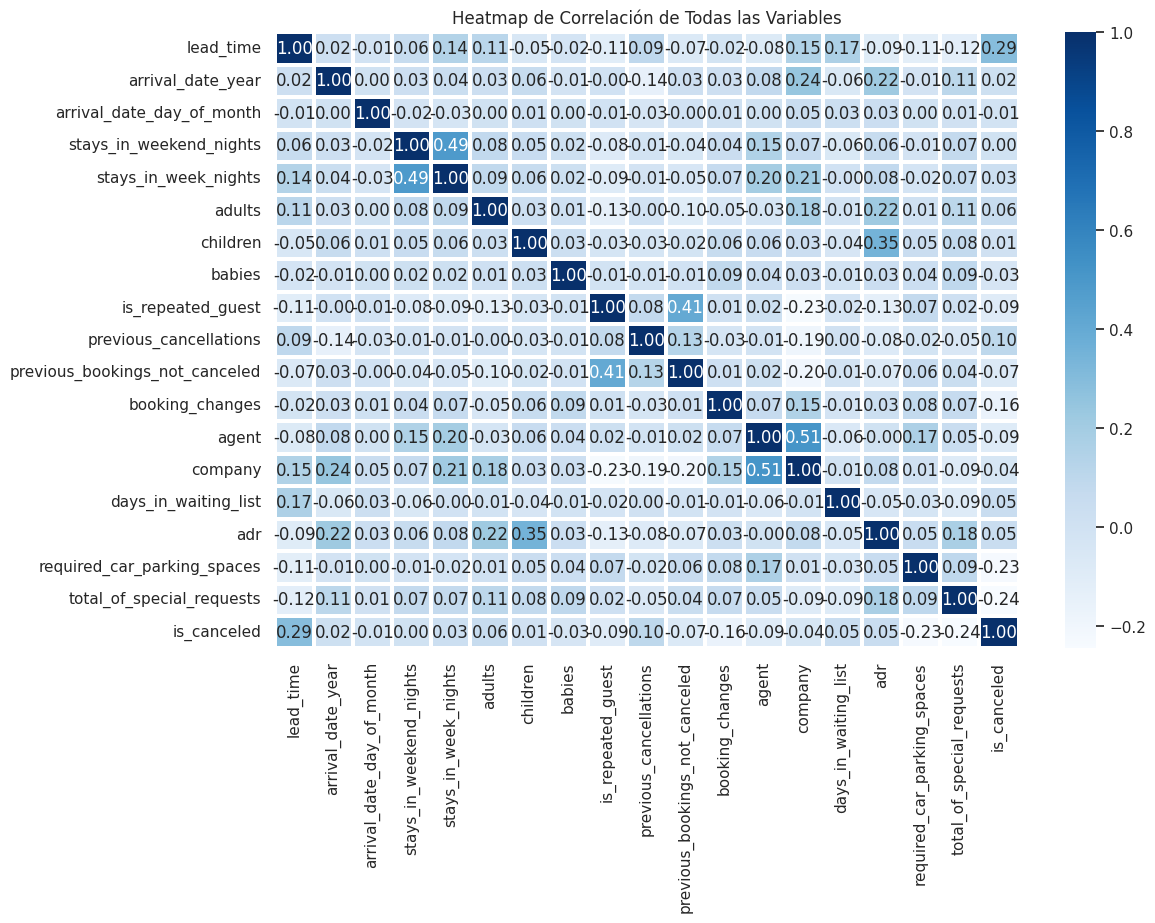

In [ ]:
plt.figure(figsize=(12, 8))
grf=sns.heatmap(hoteles_tr.corr(), annot=True, linewidths=1.5, fmt =".2f", cmap = 'Blues')
plt.title('Heatmap de Correlación de Todas las Variables')
plt.show()

Como se puede ver en el HeatMap, hay varias variables con correlación, estas son:
1. stays_in_weekend_nights y stays_in_week_nights
2. previous_bookings_not_canceled y is_repeated_guest
3. children y adr
4. lead_time y is_cancelled, 29%
5. agent y company


Todas tienen correlación positiva.

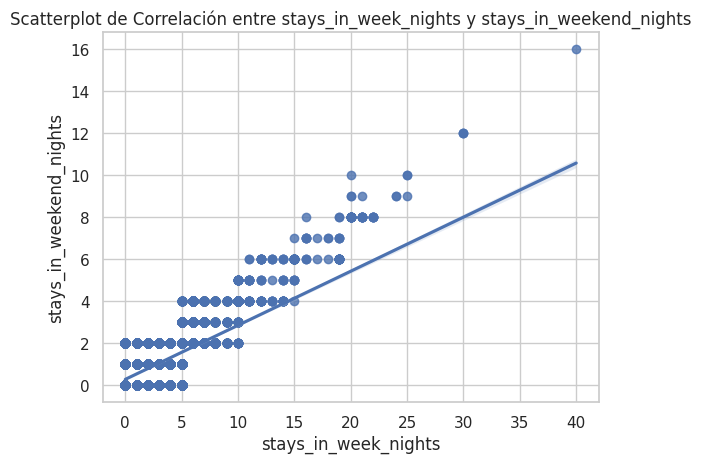

In [ ]:
sns.regplot(x=hoteles_tr["stays_in_week_nights"], y=hoteles_tr["stays_in_weekend_nights"])
plt.title('Scatterplot de Correlación entre stays_in_week_nights y stays_in_weekend_nights')
plt.show()

En  el grafico se puede observar que la pendiente es creciente, ya que al aumentar las reservas de fin de semana aumentan en consecuencia las de durante la semana.

Ahora realizamos la correlación de Pearson

In [ ]:
columnas = {'Columna1' : hoteles_tr.stays_in_weekend_nights,
             'Columna2' : hoteles_tr.stays_in_week_nights }

df = pd.DataFrame(columnas)

# Calcular la correlación de Pearson entre Columna1 y Columna2
correlacion = df['Columna1'].corr(df['Columna2'], method='pearson')

print(f"La correlación de Pearson entre Columna1 y Columna2 es: {correlacion}")

La correlación de Pearson entre Columna1 y Columna2 es: 0.48870973728040334


Como se puede observar la correlación de Pearson es mayor a cero por lo tanto están relaciocionadas linealmente pero como esta no es uno, no están correlacionadas de forma perfecta

En el caso segundo caso, las reservas no canceladas tengan relación con si es un huesped repetido, es lógico ya que si ya fue una vez al hotel, ya sabe lo que esperar.

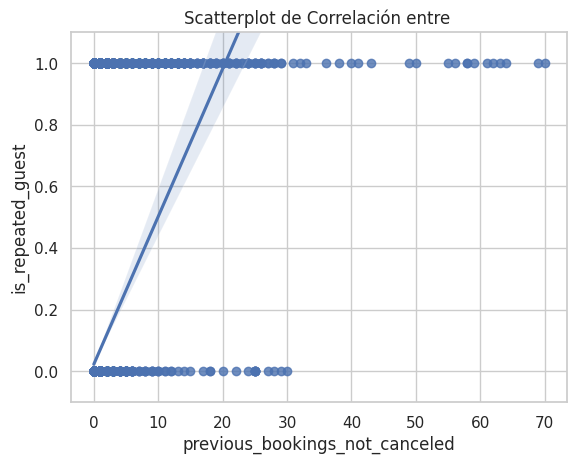

In [ ]:
sns.regplot(x=hoteles_tr["previous_bookings_not_canceled"], y=hoteles_tr["is_repeated_guest"])
plt.title('Scatterplot de Correlación entre ')
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
columnas = {'Columna1' : hoteles_tr.previous_bookings_not_canceled,
             'Columna2' : hoteles_tr.is_repeated_guest }

df = pd.DataFrame(columnas)

# Calcular la correlación de Pearson entre Columna1 y Columna2
correlacion = df['Columna1'].corr(df['Columna2'], method='pearson')

print(f"La correlación de Pearson entre Columna1 y Columna2 es: {correlacion}")

La correlación de Pearson entre Columna1 y Columna2 es: 0.40602970243434483


En el tercero, que los niños y el ADR (precio por día) tengan una relación es probable ya que si hay más huespedes, se necesita una habitación más grande.

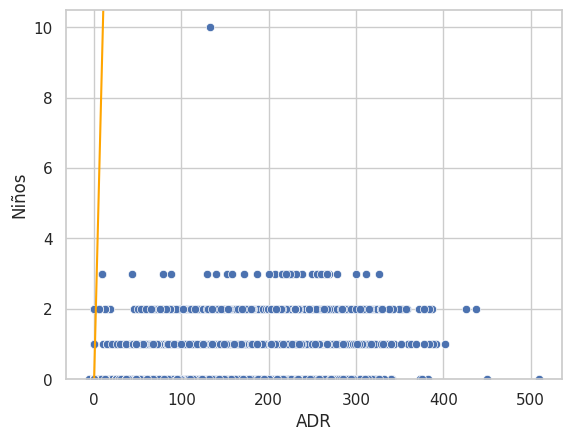

In [ ]:
informacion = hoteles_tr[['adr', 'children']]
precio_max = informacion['adr'].max()

sns.scatterplot(x='adr', y='children',data=informacion).set(xlabel='ADR', ylabel='Niños')
sns.lineplot(x=[0, precio_max], y=[0, precio_max], c='Orange')

plt.ylim(0, 10.5)
plt.show()

Como se puede ver en el gráfico, hay un *outlier* donde una reserva contiene a 10 niños, este caso lo analizaremos más adelante

In [ ]:
columnas = {'Columna1' : hoteles_tr.adr,
             'Columna2' : hoteles_tr.children }

df = pd.DataFrame(columnas)

# Calcular la correlación de Pearson entre Columna1 y Columna2
correlacion = df['Columna1'].corr(df['Columna2'], method='pearson')

print(f"La correlación de Pearson entre Columna1 y Columna2 es: {correlacion}")

La correlación de Pearson entre Columna1 y Columna2 es: 0.35048173774153285


Por último existe una correlación entre la cantidad de días antes que se realizo la reserva y si cancelo, cuánto antes haya reservado, más probable es que cancele

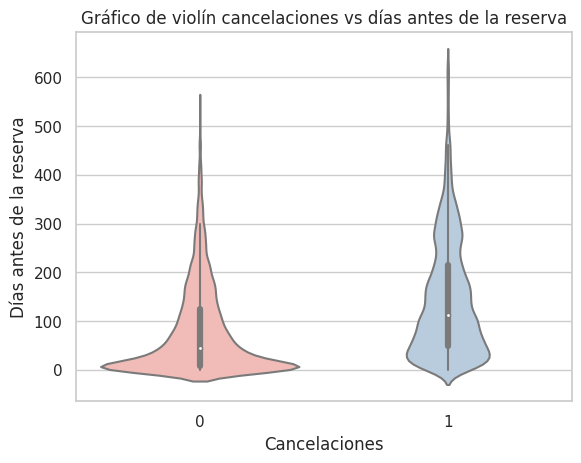

In [ ]:
informacion = hoteles_tr[['lead_time', 'is_canceled']]

"""reemplazos = {0: 'No', 1: 'Yes'}
columna = 'lead_time'
informacion[columna] = informacion[columna].replace(0, 'No')
"""
ax = sns.violinplot(x="is_canceled", y="lead_time", data=informacion, palette="Pastel1").set(title="Gráfico de violín cancelaciones vs días antes de la reserva",xlabel='Cancelaciones',ylabel='Días antes de la reserva')

plt.show()

In [ ]:
columnas = {'Columna1' : hoteles_tr.lead_time,
             'Columna2' : hoteles_tr.is_canceled }

df = pd.DataFrame(columnas)

correlacion = df['Columna1'].corr(df['Columna2'], method='pearson')

print(f"La correlación de Pearson entre Lead_time e Is_canceled es: {correlacion}")

La correlación de Pearson entre Lead_time e Is_canceled es: 0.2938160884261437


Ahora, relacionamos las variables "agent" y "company"

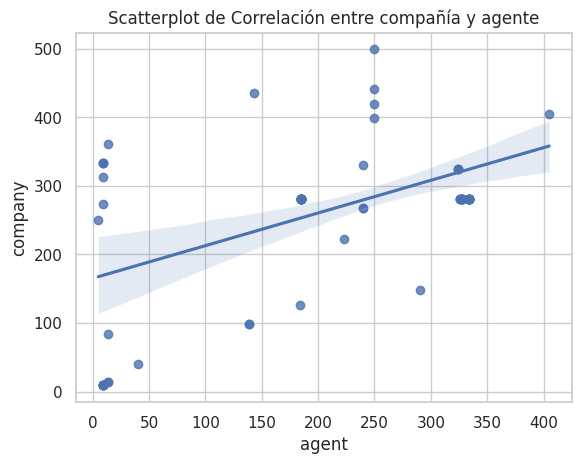

In [ ]:
sns.regplot(x=hoteles_tr["agent"], y=hoteles_tr["company"])
plt.title('Scatterplot de Correlación entre compañía y agente')
plt.show()

In [ ]:
columnas = {'Columna1' : hoteles_tr.agent,
             'Columna2' : hoteles_tr.company }

df = pd.DataFrame(columnas)

# Calcular la correlación de Pearson entre Columna1 y Columna2
correlacion = df['Columna1'].corr(df['Columna2'], method='pearson')

print(f"La correlación de Pearson entre agent y company es: {correlacion}")

La correlación de Pearson entre agent y company es: 0.5149693278016929


# **Analizar las variables con el target**


Para analizar las variables con el target que es el "is_canceled" dividimos el análisis entre las variables cualitativas y cuantativas

**Variables cuantitativas**

Elegimos las variables que tienen correlación y que son coherentes para análisar con el target



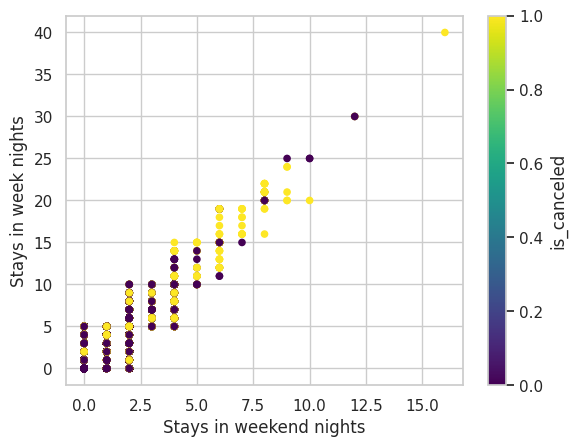

In [ ]:
hoteles_tr.plot.scatter(x="stays_in_weekend_nights", y="stays_in_week_nights", c= "is_canceled", colormap="viridis").set(xlabel='Stays in weekend nights', ylabel='Stays in week nights')

plt.show()



Por el gráfico se puede observar que si el huésped se va a quedar en días de semana y no en los findes, es menos probable que cancele. Ahora de cuánto más tiempo sea la reserva, más probable es que cancelen

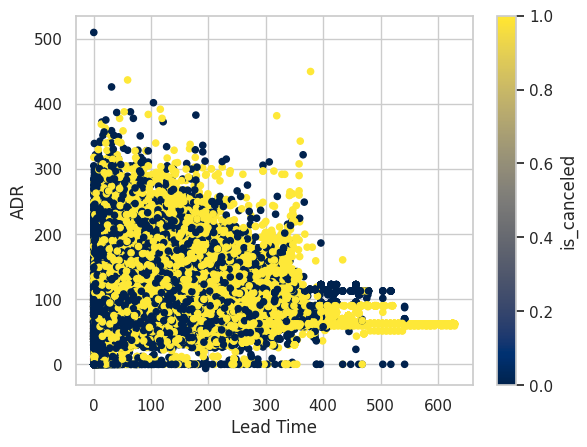

In [ ]:
hoteles_tr.plot.scatter(x="lead_time", y="adr", c= "is_canceled", colormap="cividis").set(xlabel='Lead Time', ylabel='ADR')

plt.show()

Si bien el gráfico puede ser un poco caótico, podemos ver que cuánto antes haya sido hecho la reserva, más probable es que cancelen. También si el precio es de alrededor de los 75, 100 o los 300, es más probable que se cancele. Ahora si el precio es de alredero de los 125 es probable que no cancele

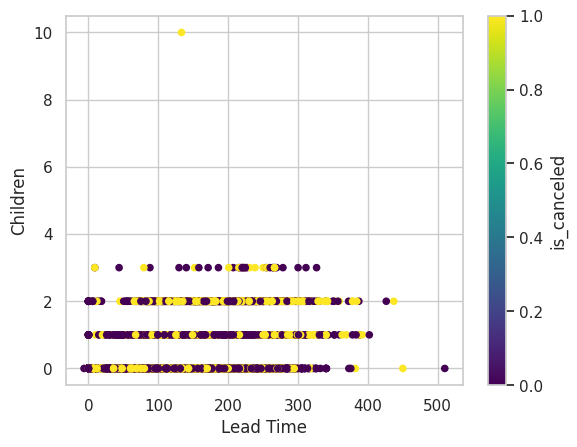

In [ ]:
hoteles_tr.plot.scatter(x="adr", y="children", c= "is_canceled", colormap="viridis").set(xlabel='Lead Time', ylabel='Children')

plt.show()

Como se puede observar en el gráfico, si la reserva no contiene niños, menos probable es de que sea cancelada. Igualmente también se puede observar que cuanto antes fue hecha la reserva y si no hay niños peude ser que cancele.

Además, si hay más niños y mayor tiempo antes fue hecha la reserva, más probable es que cancele

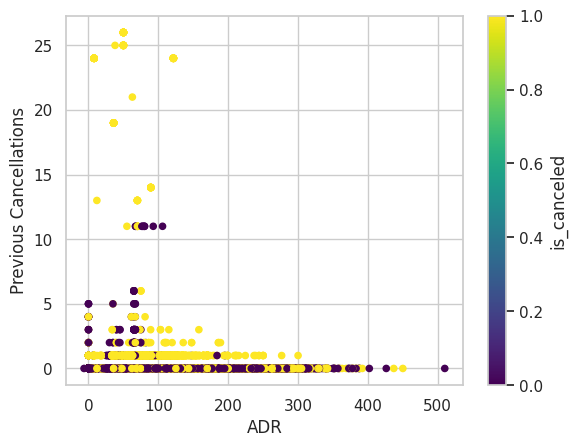

In [ ]:
hoteles_tr.plot.scatter(x="adr", y="previous_cancellations", c= "is_canceled", colormap="viridis").set(xlabel='ADR', ylabel='Previous Cancellations')

plt.show()

Se puede ver que cuantas mas cancelaciones previas hubo, más probable es que cancele. Ahora si el precio se mantiene entre los 0 y 250, y hubo una cancelación previa, es más probable que cancelen

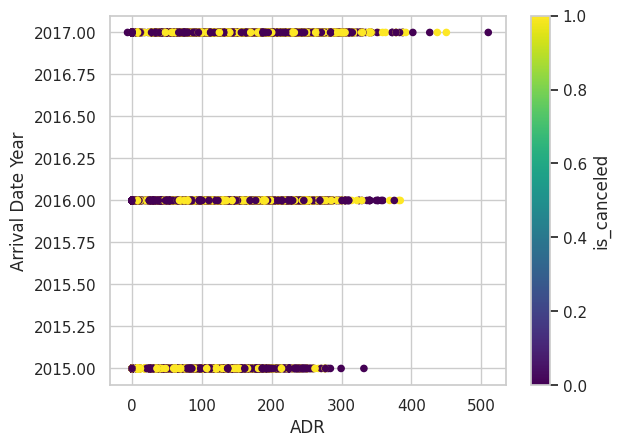

In [ ]:
hoteles_tr.plot.scatter(x="adr", y="arrival_date_year", c= "is_canceled", colormap="viridis").set(xlabel='ADR', ylabel='Arrival Date Year')

plt.show()

Al paso de los años, más caro es el precio. Las probabilidades de que cancelen son casi las mismas en los tres casos

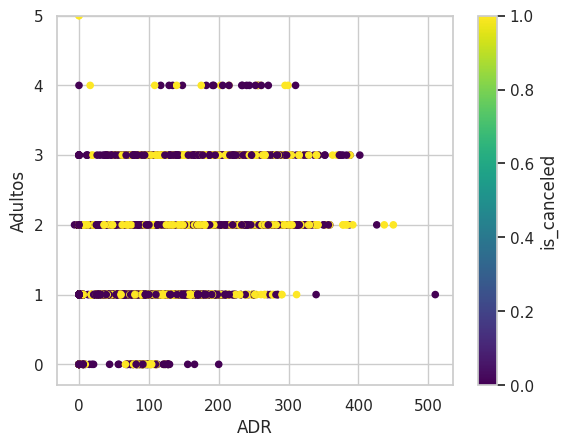

In [ ]:
hoteles_tr.plot.scatter(x="adr", y="adults", c= "is_canceled", colormap="viridis").set(xlabel='ADR', ylabel='Adultos')
plt.ylim(-0.3,5)
plt.show()

Si la cantitdad de adultos es 1 o 3 es poco probable que se cancele  al igual que 4. Ahora si son dos adultos, es más probalbe que se cancele

**Variables Cualitativas**

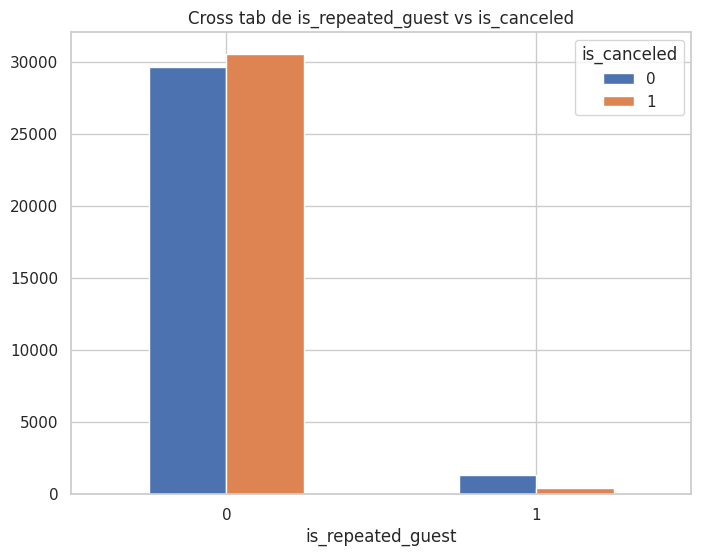

In [ ]:
tabla = pd.crosstab(index=hoteles_tr['is_repeated_guest'], columns=hoteles_tr['is_canceled'])

ax = tabla.plot(kind='bar', figsize=(8, 6), rot=0)

plt.xlabel('is_repeated_guest')
plt.title('Cross tab de is_repeated_guest vs is_canceled')
plt.show()

Si es un huésped habitual, es poco probable que cancele sino es casi igual de probable que cancelen o no.

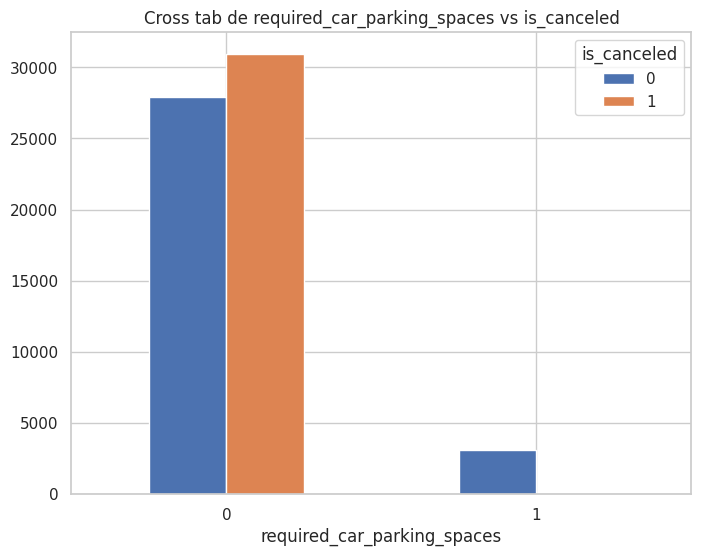

In [ ]:
tabla = pd.crosstab(index=hoteles_tr['required_car_parking_spaces'], columns=hoteles_tr['is_canceled'])

ax = tabla.plot(kind='bar', figsize=(8, 6), rot=0)

plt.xlim(-0.5,1.5)
plt.xlabel('required_car_parking_spaces')
plt.title('Cross tab de required_car_parking_spaces vs is_canceled')
plt.show()

Si necesita parking es muy probable que no cancele

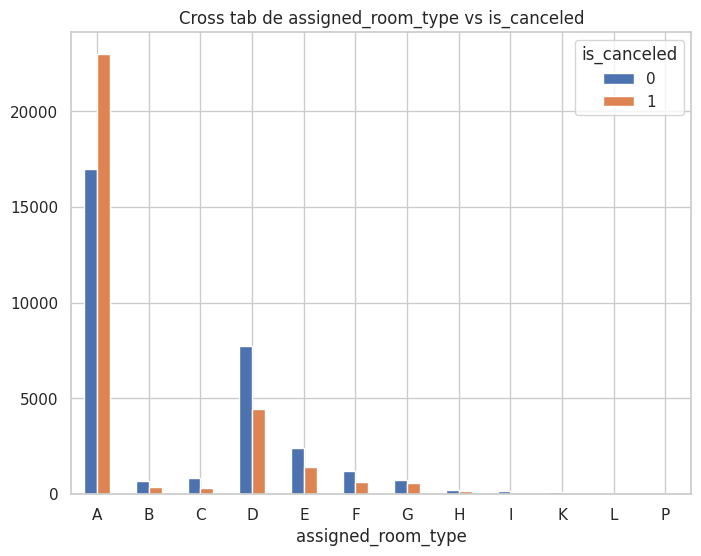

In [ ]:
tabla = pd.crosstab(index=hoteles_tr['assigned_room_type'], columns=hoteles_tr['is_canceled'])

ax = tabla.plot(kind='bar', figsize=(8, 6), rot=0)

plt.xlabel('assigned_room_type')
plt.title('Cross tab de assigned_room_type vs is_canceled')
plt.show()

Los huespedes suelen reservar la habitación del tipo A y es más probable que cancelen a que no. En cambio si reservan la habitación de tipo D es menos probable que cancelen. Lo mismo sucede con la B, C, E, F y G.

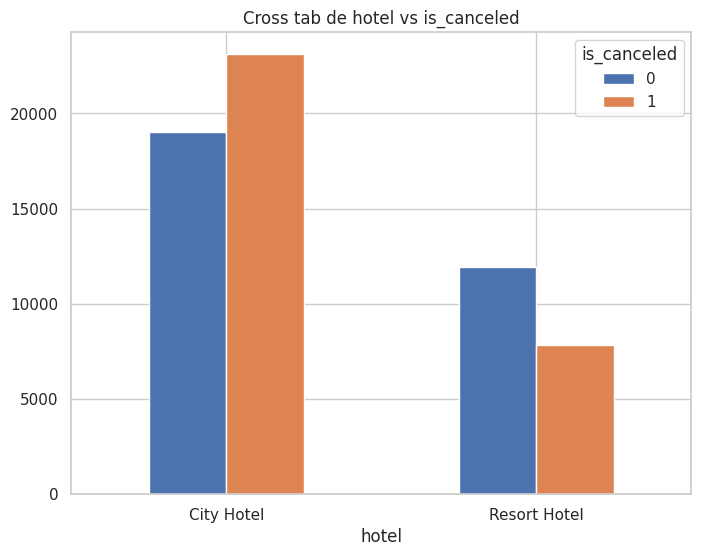

In [ ]:
tabla = pd.crosstab(index=hoteles_tr['hotel'], columns=hoteles_tr['is_canceled'])

ax = tabla.plot(kind='bar', figsize=(8, 6), rot=0)

plt.xlabel('hotel')
plt.title('Cross tab de hotel vs is_canceled')
plt.show()

Hay más reservas en el City Hotel y es más probable que cancelen en este. En cambio, si reservan en el Resort Hotel es menos probable que cancelen

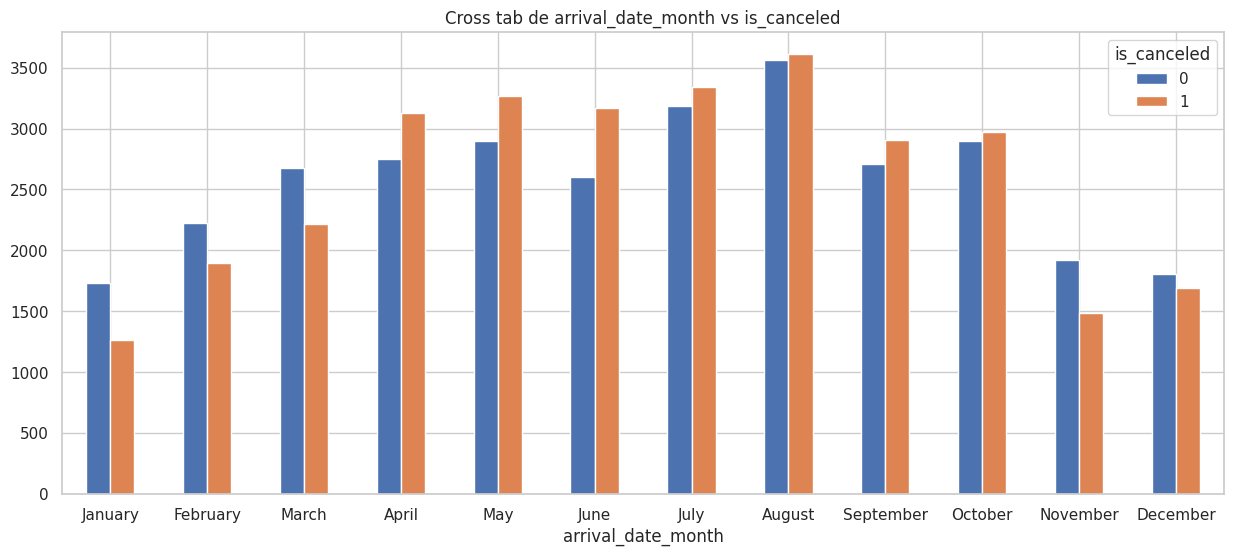

In [ ]:
hoteles_ordenados = hoteles_tr
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December' ]
hoteles_ordenados['arrival_date_month'] = pd.Categorical(
    hoteles_ordenados['arrival_date_month'],
    categories=meses_ordenados,
    ordered=True
)

tabla = pd.crosstab(index=hoteles_ordenados['arrival_date_month'], columns=hoteles_ordenados['is_canceled'])

ax = tabla.plot(kind='bar', figsize=(15, 6), rot=0)

plt.xlabel('arrival_date_month')
plt.title('Cross tab de arrival_date_month vs is_canceled')
plt.show()

Los meses que es más probable que cancelen a que no son: Abril, Mayo, Junio, Julio y Septiembre, en Agosto y Octubre también pero es muy pequeña la diferencia.

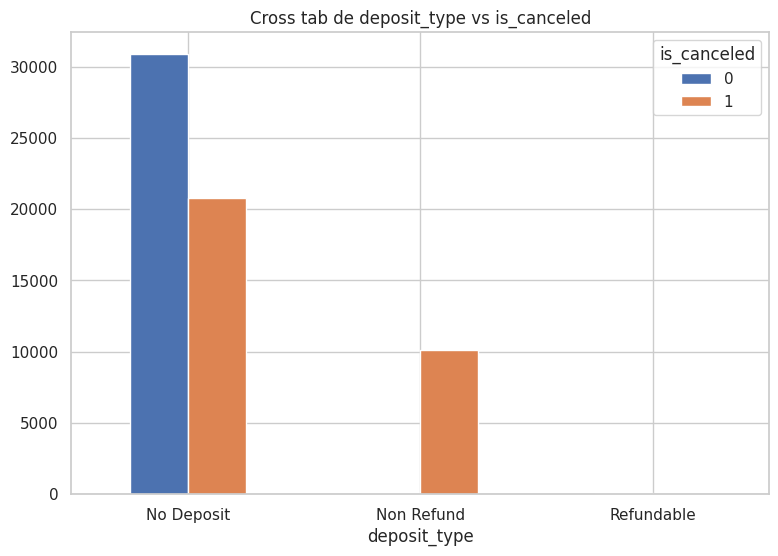

In [ ]:
tabla = pd.crosstab(index=hoteles_tr['deposit_type'], columns=hoteles_tr['is_canceled'])

ax = tabla.plot(kind='bar', figsize=(9, 6), rot=0)

plt.xlabel('deposit_type')
plt.title('Cross tab de deposit_type vs is_canceled')
plt.show()

Si el tipo de déposito es Non Refund, es muy probable que cancelen. En cambio si es No Deposit es más probable que no cancelen

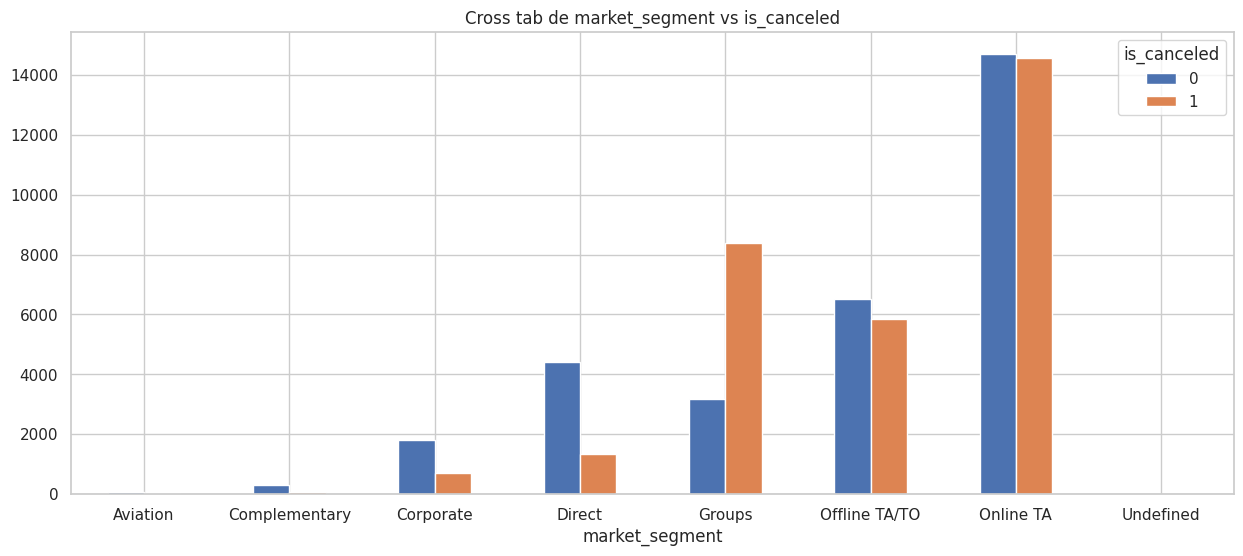

In [ ]:
tabla = pd.crosstab(index=hoteles_tr['market_segment'], columns=hoteles_tr['is_canceled'])

ax = tabla.plot(kind='bar', figsize=(15, 6), rot=0)

plt.xlabel('market_segment')
plt.title('Cross tab de market_segment vs is_canceled')
plt.show()

Si el séctor del mercado es Online TA o Online TA/TO es casi igual de probable que cancelen a que no. En cambio si es Groups es muy probable que cancelen, a diferencia de Direct o Corporate. Si es Complementary seguramente no cancelen.

#**B) Visualización de los datos: en esta sección se espera que puedan realizar una primera**
aproximación a los datos apoyándose en visualizaciones, por ejemplo: gráficos de
dispersión entre variables, histogramas, heatmaps, exploración de las columnas y
cualquier otro gráfico adicional que se considere útil justificando su utilización.

**Análisis gráfico de las distribuciones de las variables**

---



**cantidad de reservas por mes**

In [ ]:
hotel_city['arrival_date_month'].value_counts()


August       4642
May          4424
July         4233
June         4225
October      4101
September    4034
April        4029
March        3321
February     2626
November     2286
December     2229
January      1979
Name: arrival_date_month, dtype: int64

In [ ]:
hotel_resort['arrival_date_month'].value_counts()

August       2534
July         2291
April        1849
October      1762
May          1735
September    1585
March        1578
June         1547
February     1499
December     1264
November     1118
January      1022
Name: arrival_date_month, dtype: int64

**Grafico de distribucion de las reservas por mes**

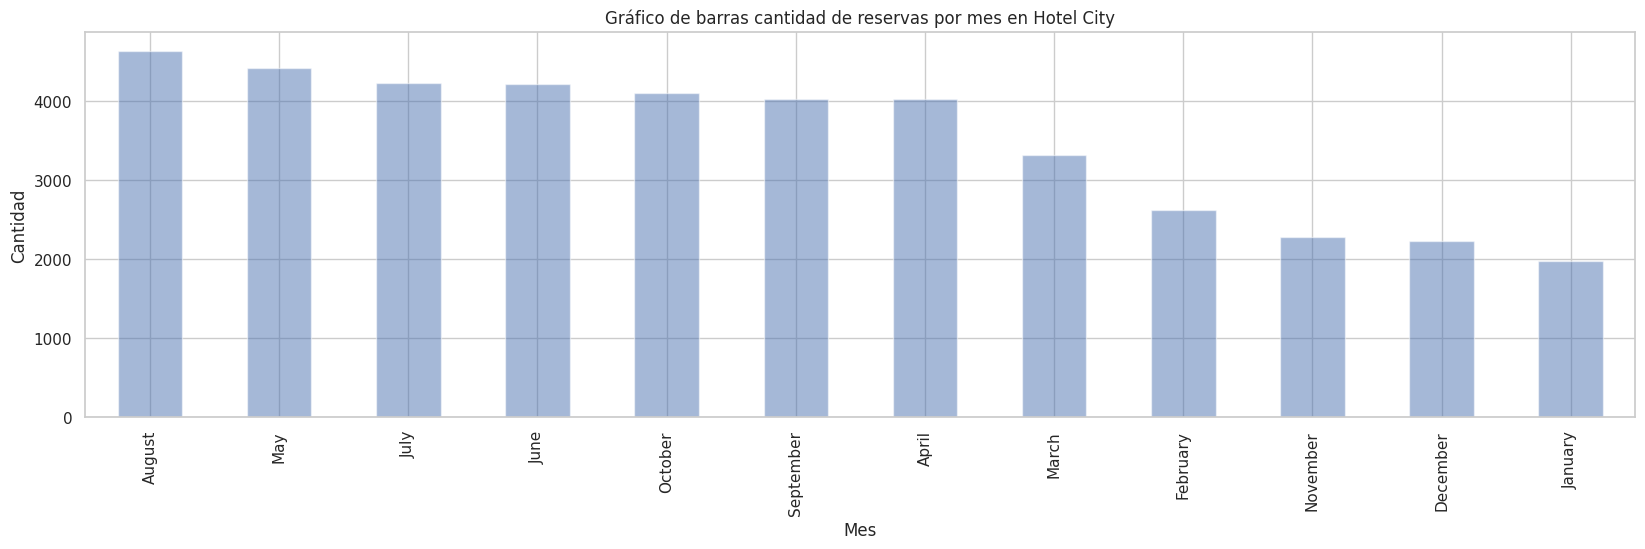

In [ ]:
grf_month = hotel_city['arrival_date_month'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de reservas por mes en Hotel City" , xlabel="Mes" , ylabel="Cantidad", figsize=(20,5))


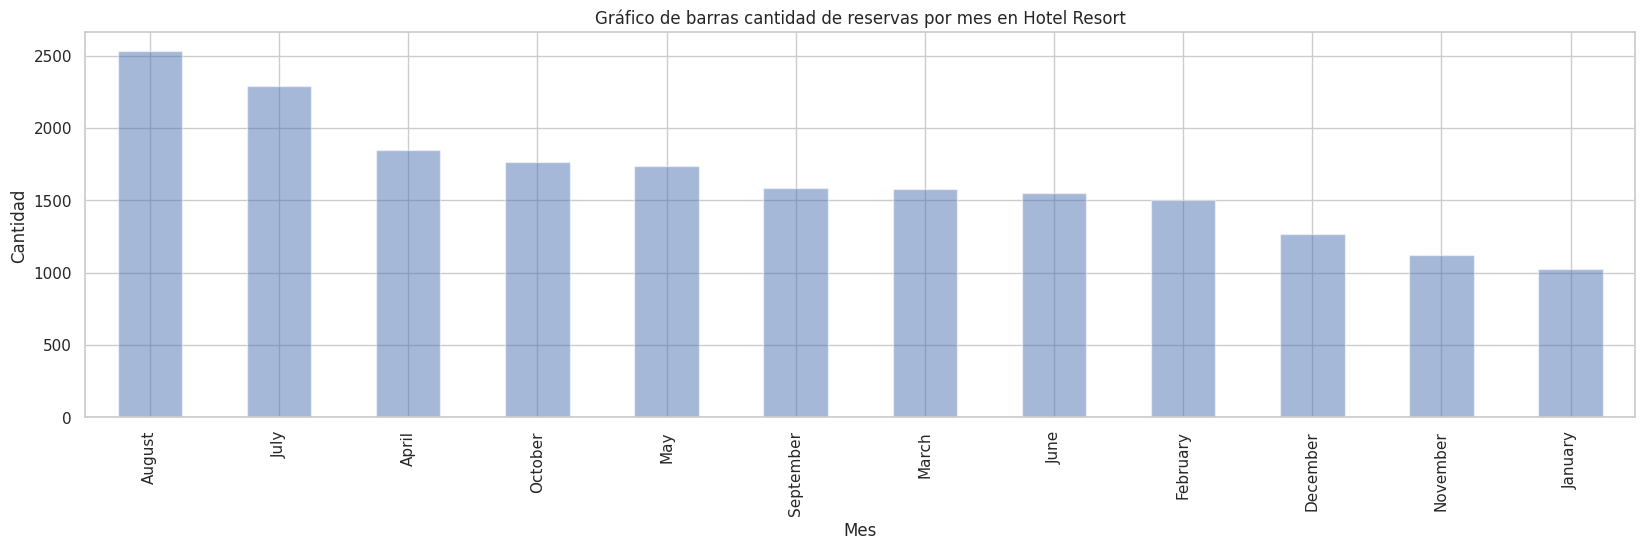

In [ ]:
grf_month = hotel_resort['arrival_date_month'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de reservas por mes en Hotel Resort" , xlabel="Mes" , ylabel="Cantidad", figsize=(20,5))


**Es logico que Agosto tenga la meyor cantidad de reservas, porque en Portugal la temporada alta de reservas es en verano**

**Grafico de distribucion del precio por abitacion**

In [ ]:
hotel_resort['adr'].value_counts()

48.00     477
0.00      337
80.00     254
68.00     252
60.00     231
         ... 
71.11       1
207.23      1
67.37       1
65.96       1
99.29       1
Name: adr, Length: 3764, dtype: int64

In [ ]:
hotel_city['adr'].value_counts()

62.00     2310
75.00     1328
90.00     1315
65.00     1034
120.00     889
          ... 
129.25       1
142.64       1
200.10       1
101.87       1
143.29       1
Name: adr, Length: 3726, dtype: int64

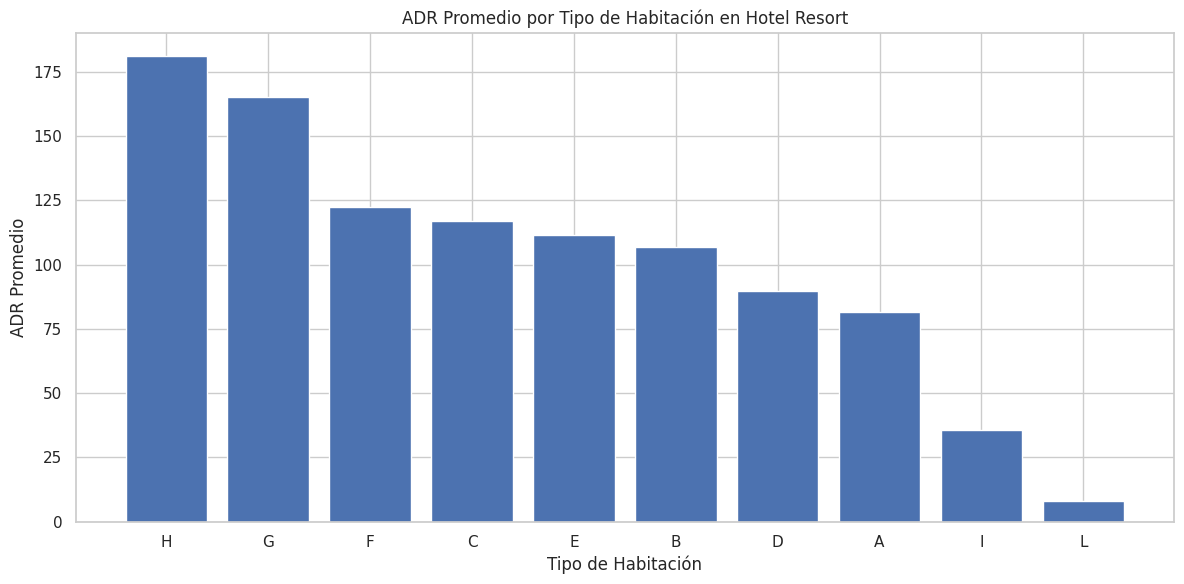

In [ ]:
adr_por_tipo_habitacion = hotel_resort.groupby('assigned_room_type')['adr'].mean().reset_index()
adr_por_tipo_habitacion = adr_por_tipo_habitacion.sort_values(by='adr', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(adr_por_tipo_habitacion['assigned_room_type'], adr_por_tipo_habitacion['adr'])
plt.title('ADR Promedio por Tipo de Habitación en Hotel Resort')
plt.xlabel('Tipo de Habitación')
plt.ylabel('ADR Promedio')
plt.tight_layout()

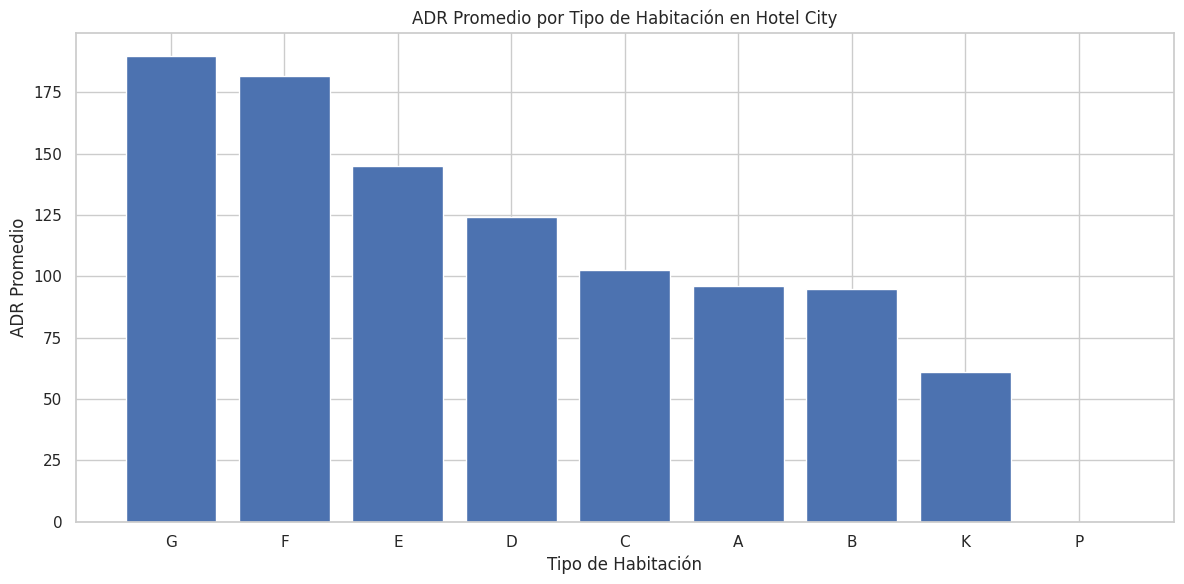

In [ ]:
adr_por_tipo_habitacion = hotel_city.groupby('assigned_room_type')['adr'].mean().reset_index()
adr_por_tipo_habitacion = adr_por_tipo_habitacion.sort_values(by='adr', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(adr_por_tipo_habitacion['assigned_room_type'], adr_por_tipo_habitacion['adr'])
plt.title('ADR Promedio por Tipo de Habitación en Hotel City')
plt.xlabel('Tipo de Habitación')
plt.ylabel('ADR Promedio')
plt.tight_layout()

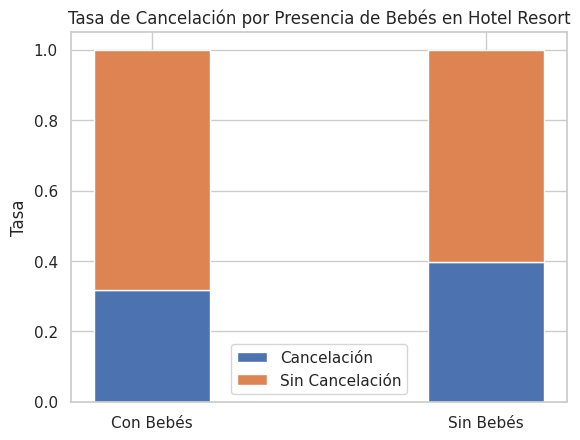

In [ ]:
cancelacion_con_bebes = hotel_resort[hotel_resort['babies'] > 0]['is_canceled']
tasa_cancelacion_con_bebes = cancelacion_con_bebes.mean()
cancelacion_sin_bebes = hotel_resort[hotel_resort['babies'] == 0]['is_canceled']
tasa_cancelacion_sin_bebes = cancelacion_sin_bebes.mean()
labels = ['Con Bebés', 'Sin Bebés']
tasa_cancelacion = [tasa_cancelacion_con_bebes, tasa_cancelacion_sin_bebes]
tasa_no_cancelacion = [1 - tasa_cancelacion_con_bebes, 1 - tasa_cancelacion_sin_bebes]

width = 0.35
fig, ax = plt.subplots()

bar1 = ax.bar(labels, tasa_cancelacion, width, label='Cancelación')
bar2 = ax.bar(labels, tasa_no_cancelacion, width, bottom=tasa_cancelacion, label='Sin Cancelación')
ax.set_ylabel('Tasa')
ax.set_title('Tasa de Cancelación por Presencia de Bebés en Hotel Resort')
ax.legend()

plt.show()

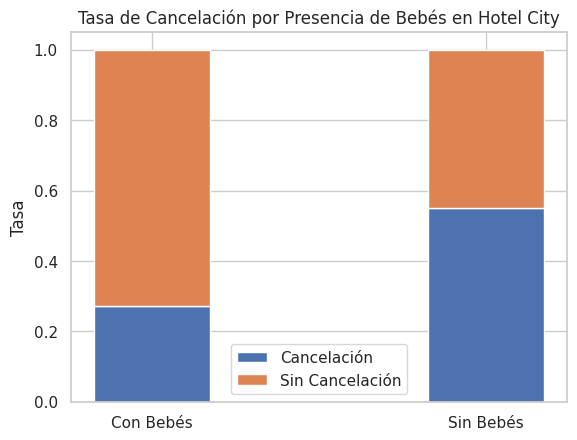

In [ ]:
cancelacion_con_bebes = hotel_city[hotel_city['babies'] > 0]['is_canceled']
tasa_cancelacion_con_bebes = cancelacion_con_bebes.mean()
cancelacion_sin_bebes = hotel_city[hotel_city['babies'] == 0]['is_canceled']
tasa_cancelacion_sin_bebes = cancelacion_sin_bebes.mean()
labels = ['Con Bebés', 'Sin Bebés']
tasa_cancelacion = [tasa_cancelacion_con_bebes, tasa_cancelacion_sin_bebes]
tasa_no_cancelacion = [1 - tasa_cancelacion_con_bebes, 1 - tasa_cancelacion_sin_bebes]

width = 0.35
fig, ax = plt.subplots()

bar1 = ax.bar(labels, tasa_cancelacion, width, label='Cancelación')
bar2 = ax.bar(labels, tasa_no_cancelacion, width, bottom=tasa_cancelacion, label='Sin Cancelación')
ax.set_ylabel('Tasa')
ax.set_title('Tasa de Cancelación por Presencia de Bebés en Hotel City')
ax.legend()

plt.show()

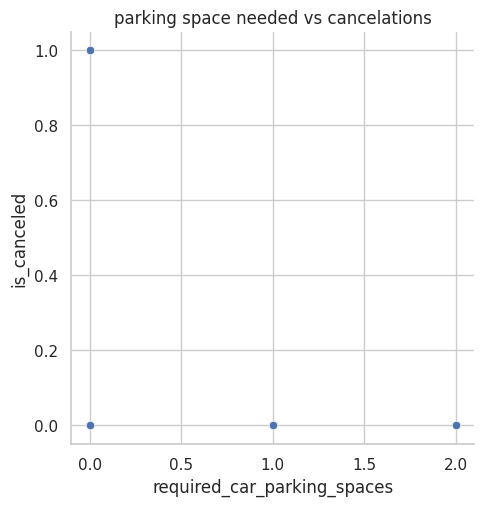

In [ ]:
graf_relplot = sns.relplot(data=hotel_city, x="required_car_parking_spaces", y="is_canceled").set(title="parking space needed vs cancelations",xlabel='required_car_parking_spaces',ylabel='is_canceled')


#**C: Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset**

In [ ]:
hoteles_tr.isna().sum()


hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0
customer_type                         0


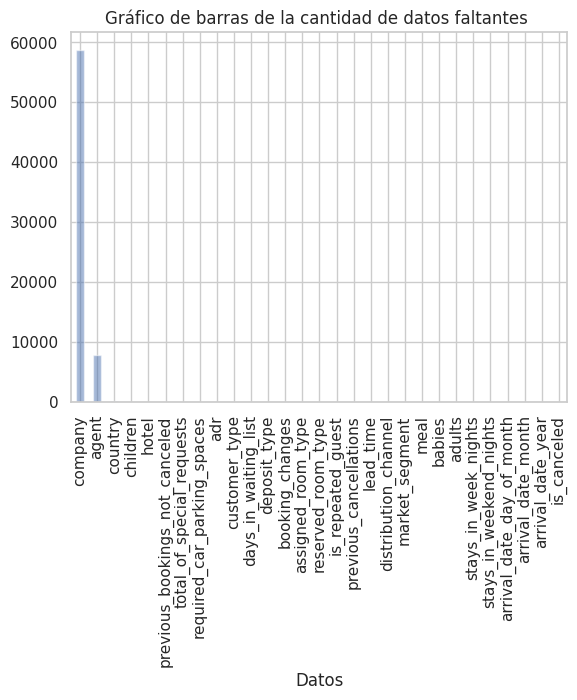

In [ ]:
valores_nulos = hoteles_tr.isna().sum()
valores_nulos = valores_nulos.sort_values(ascending=False)

grf_ds = valores_nulos.plot.bar(alpha=0.5 , title="Gráfico de barras de la cantidad de datos faltantes " , xlabel="Datos")

* A simple vista se puede observar que la variable "company" está incompleta, ya que tiene muy pocos valores cargados. Por lo tanto, descarto utilizarla


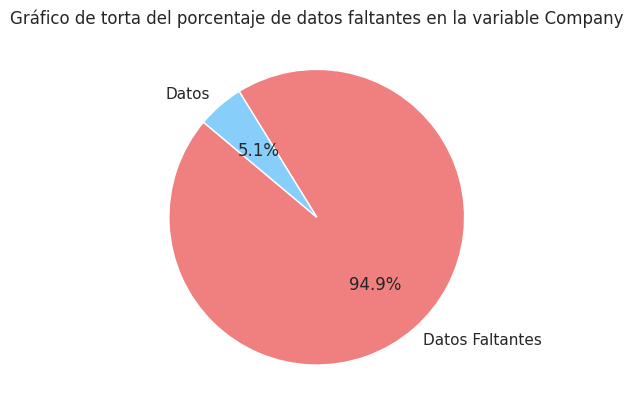

In [ ]:
total = hoteles_tr['company'].shape[0]
faltantes = hoteles_tr['company'].isna().sum()
size_of_groups = [faltantes, (total-faltantes)]

labels = ['Datos Faltantes', "Datos"]

colors = ['lightcoral', 'lightskyblue']

plt.pie(size_of_groups, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Gráfico de torta del porcentaje de datos faltantes en la variable Company")
plt.show()

Por lo tanto, eliminamos la columna "*company*" ya que si la completamos, estaríamos especulando sobre que valores tomaría.

In [ ]:
hoteles_tr = hoteles_tr.drop(['company'],axis=1)

Ahora, para la variable "agent" vemos cual es el porcentaje de datos faltantes

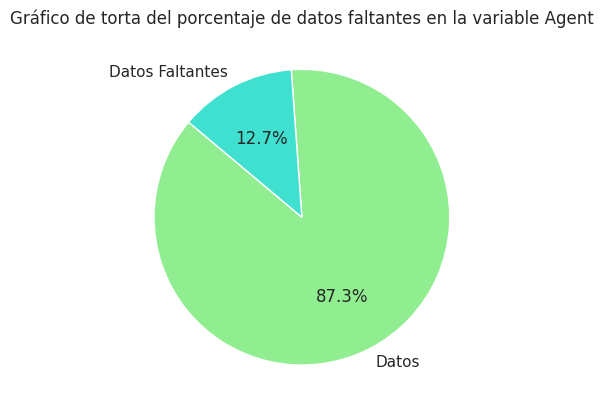

61913 7890


In [ ]:
total = hoteles_tr['agent'].shape[0]
faltantes = hoteles_tr['agent'].isna().sum()
size_of_groups = [total-faltantes, faltantes]

labels = ['Datos', "Datos Faltantes"]

colors = ['lightgreen', 'turquoise']

plt.pie(size_of_groups, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Gráfico de torta del porcentaje de datos faltantes en la variable Agent")
plt.show()

print(hoteles_tr['agent'].shape[0], hoteles_tr['agent'].isna().sum())

Remplazaos los datos faltantes  de agent con la media

In [ ]:
hoteles_tr['agent'].fillna(hoteles_tr['agent'].mode()[0], inplace=True)

Realizamos el mismo grafico de torta para los valores faltantes de "country"

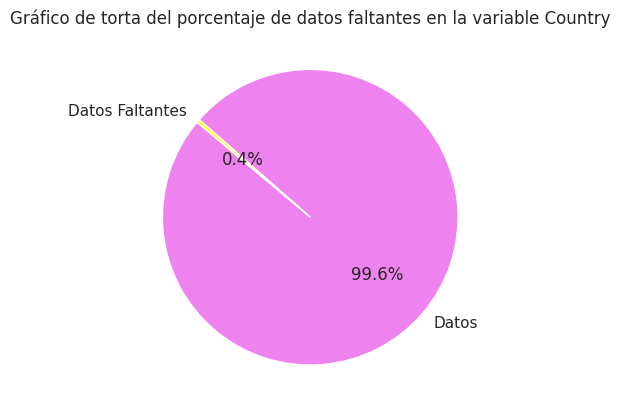

In [ ]:
total = hoteles_tr['country'].shape[0]
faltantes = hoteles_tr['country'].isna().sum()
size_of_groups = [total-faltantes, faltantes]

labels = ['Datos', "Datos Faltantes"]

colors = ['violet', 'yellow']

plt.pie(size_of_groups, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Gráfico de torta del porcentaje de datos faltantes en la variable Country")
plt.show()


Como la variable "country" también tiene datos faltantes, completamos con "unknown"

In [ ]:
hoteles_tr["country"] = hoteles_tr["country"].fillna('unknown')

Realizamos el mismo grafico de torta para los valores faltantes de "children"

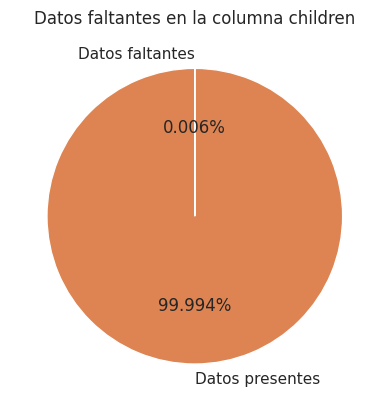

In [ ]:
datos_faltantes = hoteles_tr['children'].isnull().sum()

labels = ['Datos faltantes', 'Datos presentes']

sizes = [datos_faltantes, len(hoteles_tr) - datos_faltantes]
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=90)

plt.title('Datos faltantes en la columna children')

plt.show()

Remplazamos los datos faltantes de children con la moda

In [ ]:
hoteles_tr['children'].fillna(hoteles_cuantitativos["moda"]["children"], inplace=True)

Verificamos que ya no queden mas datos faltantes.

In [ ]:
hoteles_tr.isna().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
is_canceled                 

#**D) Valores atipicos: en esta sección se espera analizar la existencia de valores atípicos**
Los valores atipicos, tambien conocidos como outliers, al momento de realizar analisis de datos, es fundamental encontrarlos para no tener errores en nuestra resultados, ya que pueden alterar nuestra prediccion. En esta seccion nos ocuparemos de buscar univariadamente y multivariadamente estos valores, y realizar la correccion correspondiente.

#**Analisis Univariado**

No todas las variables pueden tener valores atipicos, por eso rearmamos el dataset, pero solo con las variables adecuadas para el analisis.


In [ ]:
hoteles_tr.apply(lambda col: '; '.join(map(str, col.unique())))

hotel                                                      City Hotel; Resort Hotel
lead_time                         49; 4; 25; 26; 104; 1; 112; 192; 257; 46; 349;...
arrival_date_year                                                  2016; 2015; 2017
arrival_date_month                September; October; December; March; November;...
arrival_date_day_of_month         5; 31; 13; 12; 19; 14; 4; 10; 15; 26; 20; 23; ...
stays_in_weekend_nights                    1; 0; 2; 3; 4; 6; 5; 10; 8; 9; 7; 16; 12
stays_in_week_nights              2; 1; 5; 9; 3; 6; 0; 4; 8; 7; 10; 19; 11; 15; ...
adults                                  1; 2; 3; 0; 4; 5; 40; 20; 6; 26; 10; 27; 55
children                                                   0.0; 2.0; 1.0; 3.0; 10.0
babies                                                                   0; 1; 2; 9
meal                                                      BB; HB; SC; Undefined; FB
country                           USA; PRT; CHE; FRA; AGO; GBR; DEU; ESP; RO

Las variables cualitativas que pueden tener valores atipicos son:

1.   lead_time
1.   stays_in_weekend_nights
2.   stays_in_week_nights
1.   adults
1.   children
2.   babies
1.   previous_cancellations
2.   days_in_waiting_list
1.   completar las que faltan !!!!!

Armo un dataset con estas variables



In [ ]:

ds_atipicos = hoteles_tr[['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies', 'previous_cancellations',
                            'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr','total_of_special_requests']]

ds_atipicos

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,total_of_special_requests
0,49,1,2,1,0.0,0,0,0,0,0,115.50,1
1,4,0,1,2,0.0,0,0,0,0,0,42.00,0
2,25,0,1,2,2.0,0,0,0,0,0,229.00,2
3,26,2,5,2,0.0,0,0,0,0,0,75.00,0
4,104,2,5,2,0.0,0,0,0,0,0,75.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
61908,24,0,2,2,0.0,0,0,0,0,0,48.00,1
61909,0,0,1,1,0.0,0,0,0,0,0,149.00,0
61910,10,1,2,1,0.0,0,0,0,0,0,95.00,0
61911,143,2,5,2,0.0,0,0,0,0,0,36.05,0


Para empezar con el analisis de valores atipicos univariados, realizo los diagramas de caja de cada variable.

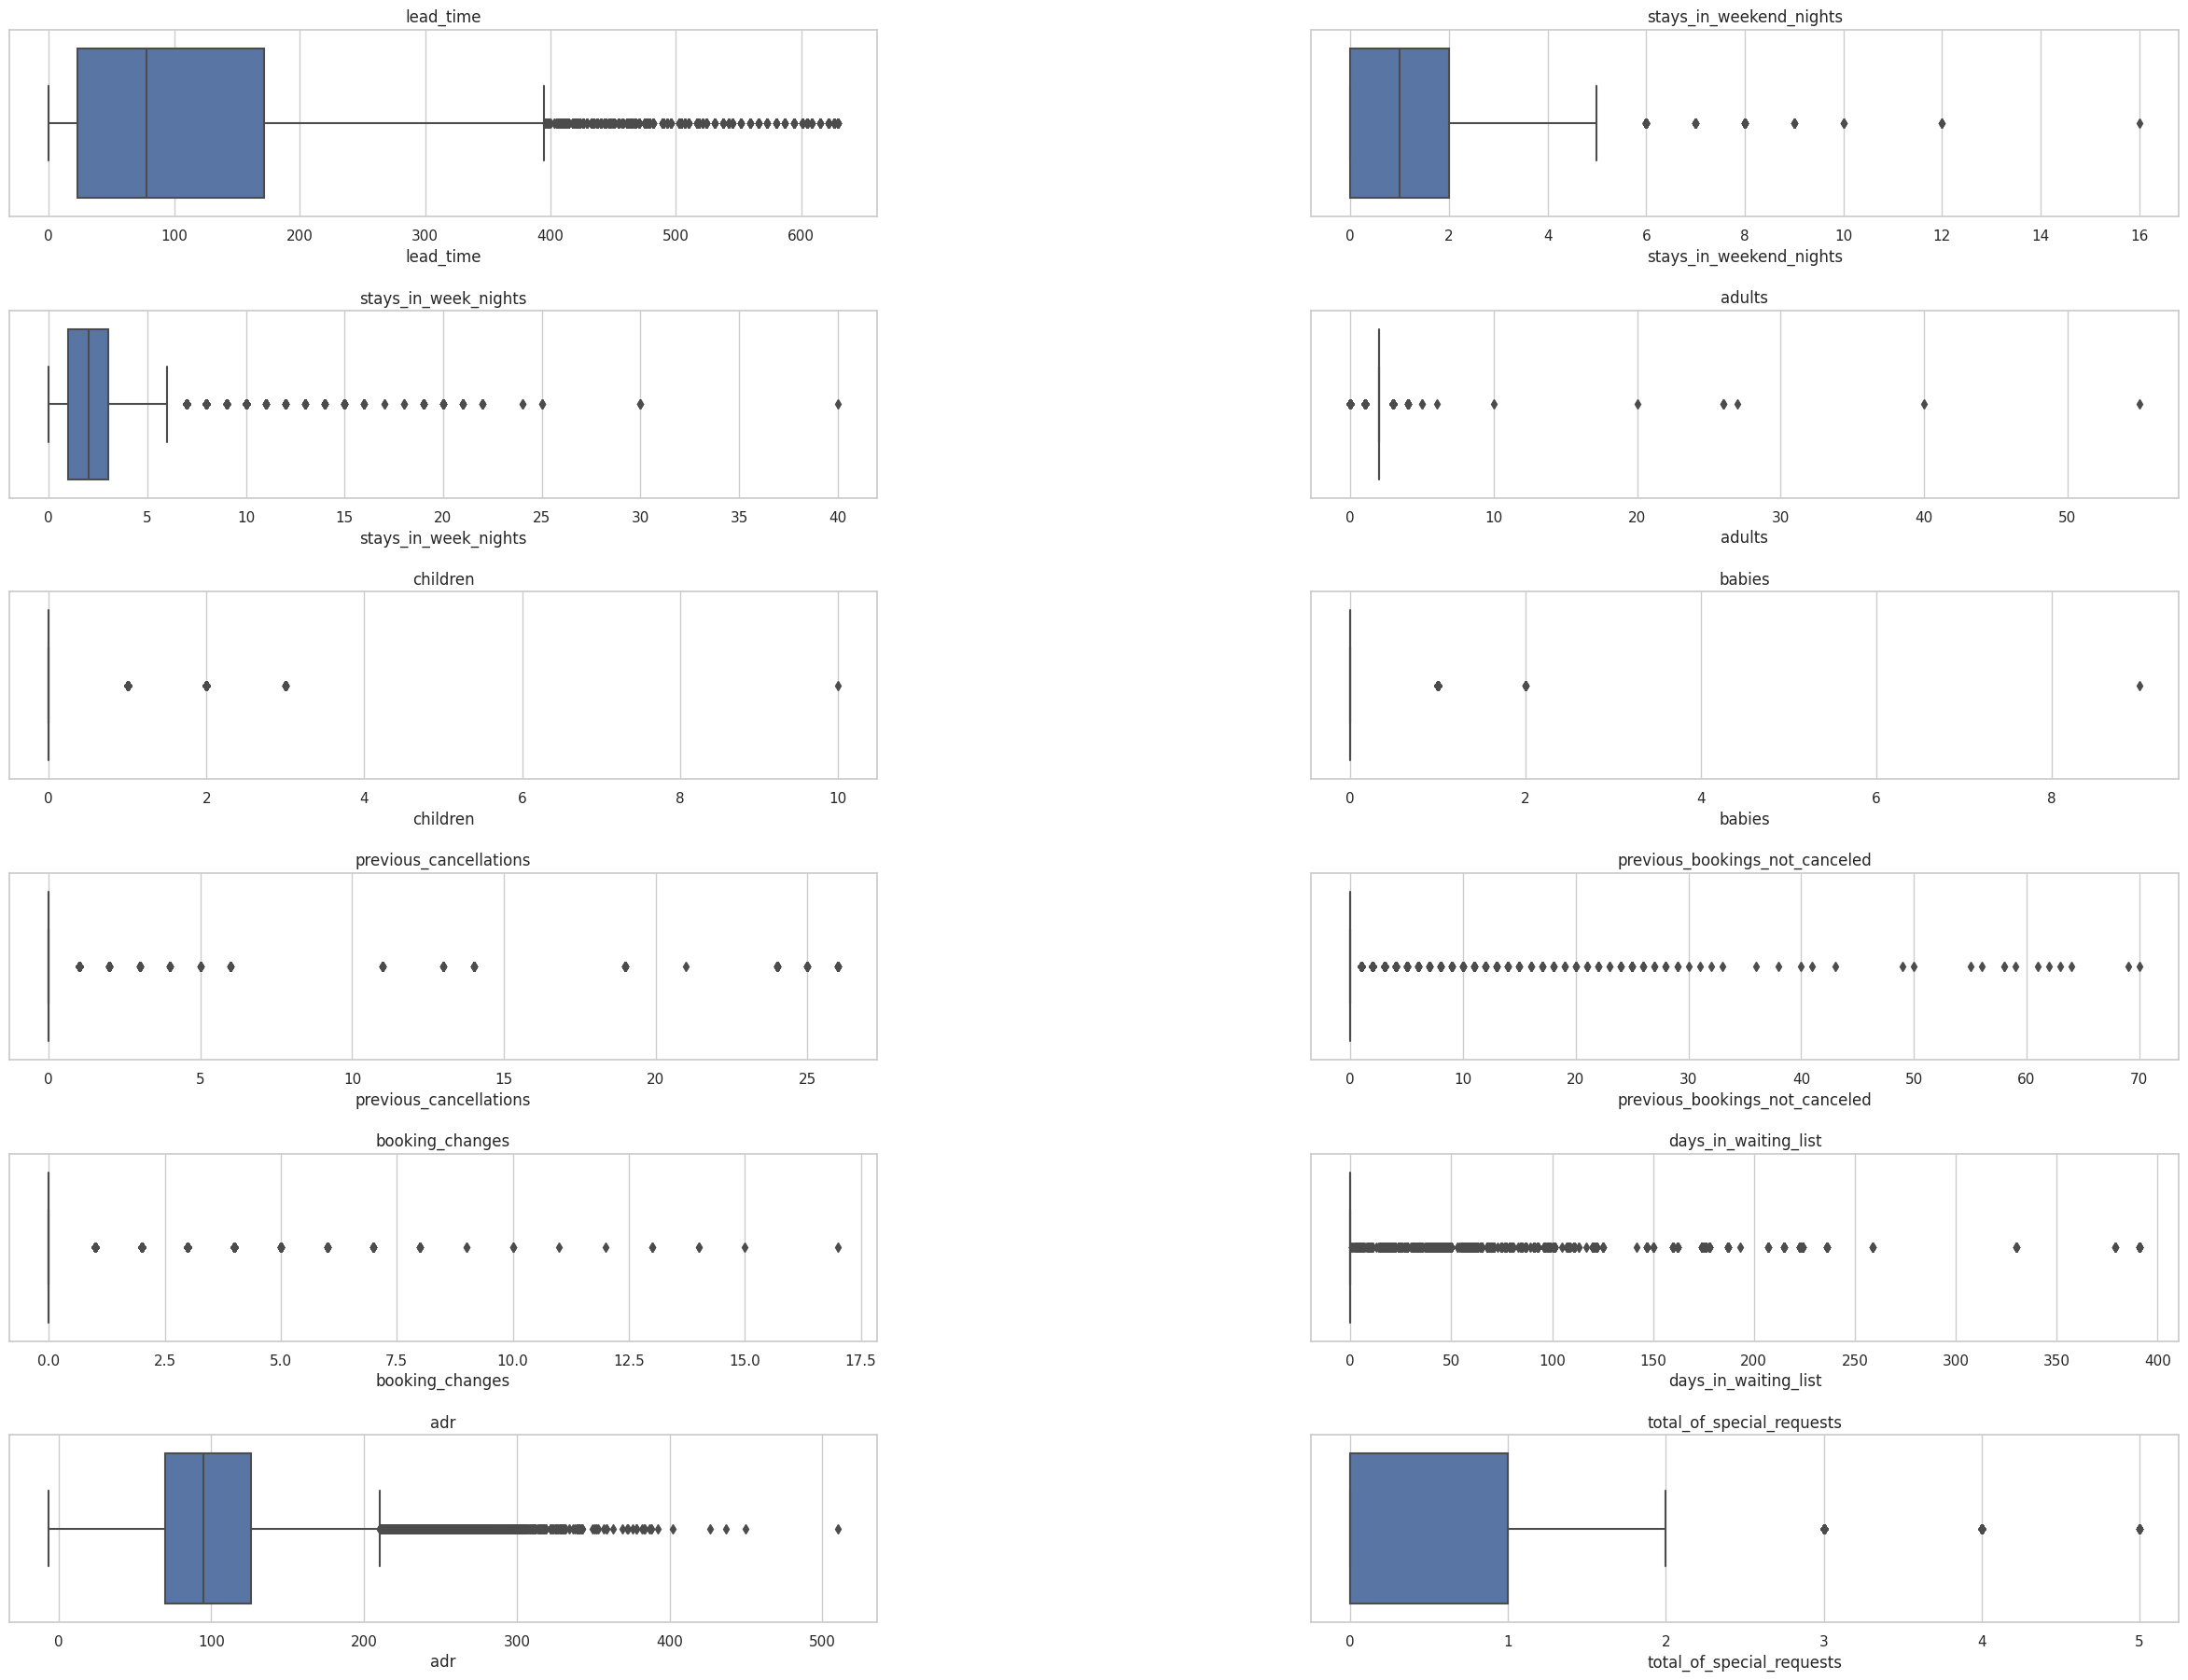

In [ ]:
def plot_boxplots(dataframe):
    sns.set(style="whitegrid")

    plt.figure(figsize=(30, 30))

    for i, column in enumerate(dataframe.columns):
        plt.subplot(8, 2, i + 1)
        sns.boxplot(x=dataframe[column])
        plt.title(column)

    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    plt.show()
plot_boxplots(ds_atipicos)


Podemos observar gracias a estos diagramas, los puntos individuales están más allá de los bigotes, los consideramos valores atípicos. Estos son los valores que se desvían significativamente de la mayoría de las otras observaciones.

**adr** no tiene sentido tener un box plot ni z/score debido que que los valores varian segun el cuarto, logicamente va a ver outliers porque los mejores cuartos que son menos cantidad son mas caros
ademas viendo los precios todos tienen logica

**adults** podemos ver por el box que hay valores que superan los maximos de nuestro grafico, siendo asi outliers.


Podemos observar a primera vista que la variable Adults tiene valores nulos, esto no es posible, por eso procedemos a eliminarlos

In [ ]:
for i in range(len(hoteles_tr)):
  if hoteles_tr.adults[i] <= 0:
    hoteles_tr = hoteles_tr.drop(index = [i])


In [ ]:

mayor_a_cinco = hoteles_tr[hoteles_tr["adults"] > 5].index
hoteles_tr.drop(mayor_a_cinco , inplace=True)
hoteles_tr.adults.value_counts()

2    46962
1    11549
3     3164
4       30
5        2
Name: adults, dtype: int64

In [ ]:
"""ds_atipicos = hoteles_tr[['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies', 'is_repeated_guest', 'previous_cancellations',
                            'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr',
                           'required_car_parking_spaces', 'total_of_special_requests']]"""

"ds_atipicos = hoteles_tr[['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies', 'is_repeated_guest', 'previous_cancellations',\n                            'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr',\n                           'required_car_parking_spaces', 'total_of_special_requests']]"

**is_repeteated_guest** no tiene ni z-score ni box plot debido que sus valores son 1 y 0, dado que no hay otra posibilidad de valores distintos, no hay outliers.


**babies** los valores rondan entre 0, 1 y 2. Solo una observacion con 9 que es imposible, entonces la eliminamos.


In [ ]:
indices = hoteles_tr[hoteles_tr['babies'] == 9].index
hoteles_tr.drop(indices, inplace=True)


**children** tenemos un valor con 10 ninios en el box plot, esto es un outlier. Observamos que son dos adultos con una reserva,por ende hubo  un error de tipeo en esa variable.

In [ ]:
#hoteles_tr.children.value_counts()
hoteles_tr[hoteles_tr['children']==10]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
49181,Resort Hotel,55,2015,July,12,4,10,2,10.0,0,...,D,2,No Deposit,8.0,0,Contract,133.16,0,1,1


In [ ]:
#corregimos el error de tipeo: 10 a 1 babies
hoteles_tr.loc[hoteles_tr['children'] == 10, 'children'] = 1

**Z-score**
Para las demas variables, procedemos a analizarlas con el metodo z-score. Planteando un umbral de 3. Si el z-score de cada valor es 3 o mas, las concideramos valores atipicos.

In [ ]:
#z-scored lead_time-----> edito
media_lead_time = np.mean(hoteles_tr.lead_time)
std_lead_time=np.std(hoteles_tr.lead_time)
tr_zscore = pd.DataFrame()
tr_zscore['z_lead_time']=(hoteles_tr.lead_time - media_lead_time)/std_lead_time

tr_zscore[tr_zscore['z_lead_time']> 3]


,z_lead_time
15,3.185931
51,3.402697
95,3.086579
426,3.691719
576,4.640073
...,...
61579,3.655592
61695,3.213026
61761,3.465921
61783,3.086579


In [ ]:
#z-scored stays_in_weekend_nights-----> edito
media_stays_in_weekend_nights= np.mean(hoteles_tr.stays_in_weekend_nights)
std_stays_in_weekend_nights=np.std(hoteles_tr.stays_in_weekend_nights)
tr_zscore = pd.DataFrame()
tr_zscore['z_stays_in_weekend_nights']=(hoteles_tr.stays_in_weekend_nights - media_stays_in_weekend_nights)/std_stays_in_weekend_nights

tr_zscore[tr_zscore['z_stays_in_weekend_nights']>3]

,z_stays_in_weekend_nights
6,3.098905
94,3.098905
113,3.098905
140,3.098905
214,3.098905
...,...
61691,4.106302
61705,3.098905
61747,3.098905
61840,4.106302


In [ ]:
#z-scored stays_in_week_nights-----> edito
media_stays_in_week_nights = np.mean(hoteles_tr.stays_in_week_nights)
std_stays_in_week_nights=np.std(hoteles_tr.stays_in_week_nights)
tr_zscore = pd.DataFrame()
tr_zscore['z_stays_in_week_nights']=(hoteles_tr.stays_in_week_nights - media_stays_in_week_nights)/std_stays_in_week_nights

tr_zscore[tr_zscore['z_stays_in_week_nights']> 3]

,z_stays_in_week_nights
6,3.446984
214,3.978085
287,3.978085
325,3.978085
454,8.757994
...,...
61691,5.040287
61705,3.978085
61747,3.978085
61840,4.509186


In [ ]:
#z-scored adults-----> edito
media_adults = np.mean(hoteles_tr.adults)
std_adults=np.std(hoteles_tr.adults)
tr_zscore = pd.DataFrame()
tr_zscore['z_adults']=(hoteles_tr.adults - media_adults)/std_adults

tr_zscore[tr_zscore['z_adults']> 3]

,z_adults
2051,4.525909
2291,4.525909
3962,6.645971
4730,4.525909
11551,4.525909
12873,4.525909
17204,4.525909
20896,4.525909
24806,4.525909
25553,4.525909


In [ ]:
#z-scored previous_cancellations-----> edito
media_previous_cancellations = np.mean(hoteles_tr.previous_cancellations)
std_previous_cancellations=np.std(hoteles_tr.previous_cancellations)
tr_zscore = pd.DataFrame()
tr_zscore['z_previous_cancellations']=(hoteles_tr.previous_cancellations - media_previous_cancellations)/std_previous_cancellations

tr_zscore[tr_zscore['z_previous_cancellations']> 3]

,z_previous_cancellations
152,26.006688
337,18.973750
349,3.903170
802,26.006688
1579,10.936107
...,...
59717,13.950224
59761,23.997277
59879,10.936107
60138,25.001983


In [ ]:
#z-scored previous_bookings_not_canceled-----> edito
media_previous_bookings_not_canceled = np.mean(hoteles_tr.previous_bookings_not_canceled)
std_previous_bookings_not_canceled=np.std(hoteles_tr.previous_bookings_not_canceled)
tr_zscore = pd.DataFrame()
tr_zscore['z_previous_bookings_not_canceled']=(hoteles_tr.previous_bookings_not_canceled - media_previous_bookings_not_canceled)/std_previous_bookings_not_canceled

tr_zscore[tr_zscore['z_previous_bookings_not_canceled']> 3]

,z_previous_bookings_not_canceled
227,5.637879
267,4.207733
349,12.073538
525,5.637879
735,4.922806
...,...
61115,8.498172
61142,9.213245
61275,5.637879
61410,4.207733


In [ ]:
#z-scored booking_changes-----> edito
media_booking_changes = np.mean(hoteles_tr.booking_changes)
std_booking_changes=np.std(hoteles_tr.booking_changes)
tr_zscore = pd.DataFrame()
tr_zscore['z_booking_changes']=(hoteles_tr.booking_changes - media_booking_changes)/std_booking_changes

tr_zscore[tr_zscore['z_booking_changes']> 3]

,z_booking_changes
83,4.636002
100,7.940810
211,7.940810
231,6.288406
700,4.636002
...,...
61679,4.636002
61722,6.288406
61746,4.636002
61806,6.288406


In [ ]:

#z-scored days_in_waiting_list-----> edito
media_days_in_waiting_list = np.mean(hoteles_tr.days_in_waiting_list)
std_days_in_waiting_list=np.std(hoteles_tr.days_in_waiting_list)
tr_zscore = pd.DataFrame()
tr_zscore['z_days_in_waiting_list']=(hoteles_tr.days_in_waiting_list - media_days_in_waiting_list)/std_days_in_waiting_list

tr_zscore[tr_zscore['z_days_in_waiting_list']> 3]

,z_days_in_waiting_list
11,8.550466
52,4.740868
76,4.848181
155,3.077523
206,3.989680
...,...
61751,3.506773
61757,3.184836
61797,13.755128
61805,9.408967


In [ ]:
#z-scored adr-----> edito
media_adr = np.mean(hoteles_tr.adr)
std_adr=np.std(hoteles_tr.adr)
tr_zscore = pd.DataFrame()
tr_zscore['z_adr']=(hoteles_tr.adr - media_adr)/std_adr

tr_zscore[tr_zscore['z_adr']> 3]

,z_adr
238,4.194900
307,3.701875
320,3.924261
439,4.289308
481,3.498371
...,...
61689,3.030523
61745,4.150842
61830,3.534037
61834,4.247349


In [ ]:

#z-scored total_of_special_requests-----> edito
media_total_of_special_requests = np.mean(hoteles_tr.total_of_special_requests)
std_total_of_special_requests=np.std(hoteles_tr.total_of_special_requests)
tr_zscore = pd.DataFrame()
tr_zscore['z_total_of_special_requests']=(hoteles_tr.total_of_special_requests - media_total_of_special_requests)/std_total_of_special_requests

tr_zscore[tr_zscore['z_total_of_special_requests']>3]

,z_total_of_special_requests
32,3.195899
93,3.195899
341,3.195899
349,3.195899
421,3.195899
...,...
61444,3.195899
61564,3.195899
61702,3.195899
61818,3.195899


#**Analisis Multivariado**

hacemos un analisis mas mas profundo, para analisar los outliers en mas de una dimension

In [ ]:
from sklearn.neighbors import LocalOutlierFactor


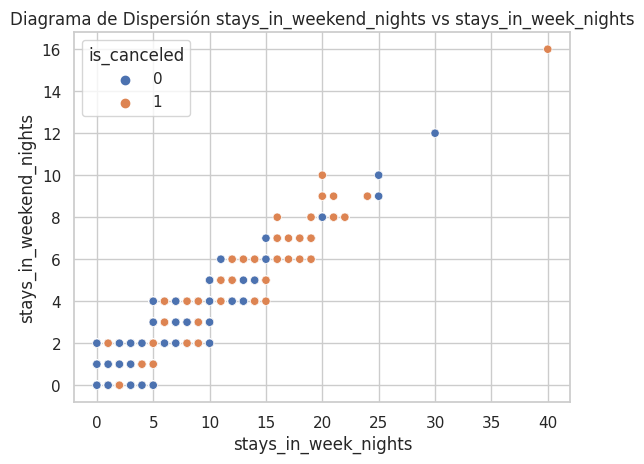

In [ ]:
#me entra una duda porque deberian ser tres
sns.scatterplot(y = hoteles_tr['stays_in_weekend_nights'],x =hoteles_tr['stays_in_week_nights'],hue=hoteles_tr['is_canceled'])
plt.title('Diagrama de Dispersión stays_in_weekend_nights vs stays_in_week_nights')
plt.show()

In [ ]:
#Conjunto de entrenamiento
X=hoteles_tr[['stays_in_weekend_nights','stays_in_week_nights']].values

#Creo el clasificador
clf = LocalOutlierFactor(n_neighbors=20)

#Genero prediccion
y_pred = clf.fit_predict(X)

#Guardo los scores
hoteles_tr['scores']=clf.negative_outlier_factor_

In [ ]:
hoteles_tr.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,scores
0,City Hotel,49,2016,September,5,1,2,1,0.0,0,...,0,No Deposit,9.0,0,Transient,115.5,0,1,1,-1.0
1,Resort Hotel,4,2015,October,31,0,1,2,0.0,0,...,0,No Deposit,9.0,0,Transient,42.0,1,0,0,-1.0
2,City Hotel,25,2016,October,13,0,1,2,2.0,0,...,0,No Deposit,9.0,0,Transient,229.0,0,2,0,-1.0
3,City Hotel,26,2016,December,12,2,5,2,0.0,0,...,0,Non Refund,154.0,0,Transient,75.0,0,0,1,-1.0
4,City Hotel,104,2017,March,19,2,5,2,0.0,0,...,0,No Deposit,20.0,0,Transient-Party,75.0,0,1,0,-1.0


**LOF** comparando is_canceles con stays_in_weekend_nights y stays_in_week_nights

<ipython-input-766-2a2e90373860>:10: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
<ipython-input-766-2a2e90373860>:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


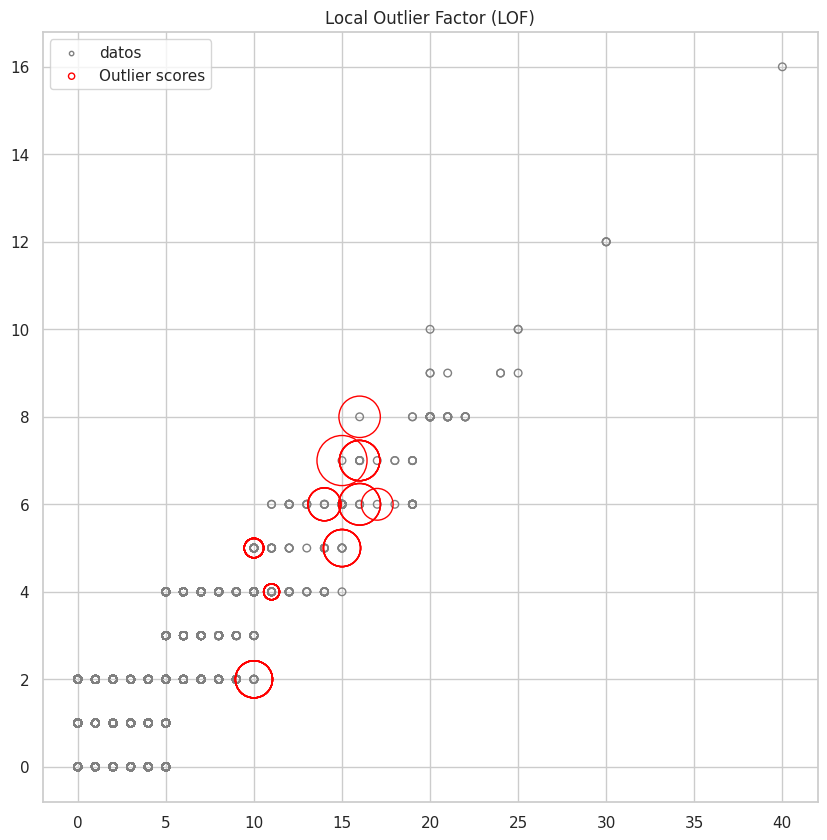

In [ ]:
#Calculo radio para plotear scores
radius = (hoteles_tr.scores.max() - hoteles_tr.scores) / (hoteles_tr.scores.max() - hoteles_tr.scores.min())

#Grafico LOF
plt.figure(figsize=(10,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(hoteles_tr.stays_in_week_nights.values,hoteles_tr.stays_in_weekend_nights.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(hoteles_tr.stays_in_week_nights.values,hoteles_tr.stays_in_weekend_nights.values, s=1300 * radius, edgecolors='red',facecolors='none', label='Outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()


buscamos outliers de

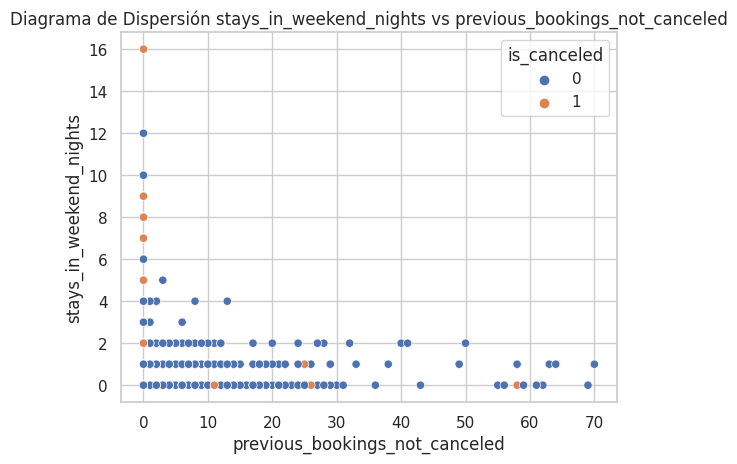

In [ ]:
#me entra una duda porque deberian ser tres
sns.scatterplot(y = hoteles_tr['stays_in_weekend_nights'],x =hoteles_tr['previous_bookings_not_canceled'],hue=hoteles_tr['is_canceled'])
plt.title('Diagrama de Dispersión stays_in_weekend_nights vs previous_bookings_not_canceled')
plt.show()

In [ ]:
#Conjunto de entrenamiento
X=hoteles_tr[['stays_in_weekend_nights','previous_bookings_not_canceled']].values

#Creo el clasificador
clf = LocalOutlierFactor(n_neighbors=20)

#Genero prediccion
y_pred = clf.fit_predict(X)

#Guardo los scores
hoteles_tr['scores']=clf.negative_outlier_factor_

<ipython-input-239-19a4d53fd570>:10: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
<ipython-input-239-19a4d53fd570>:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


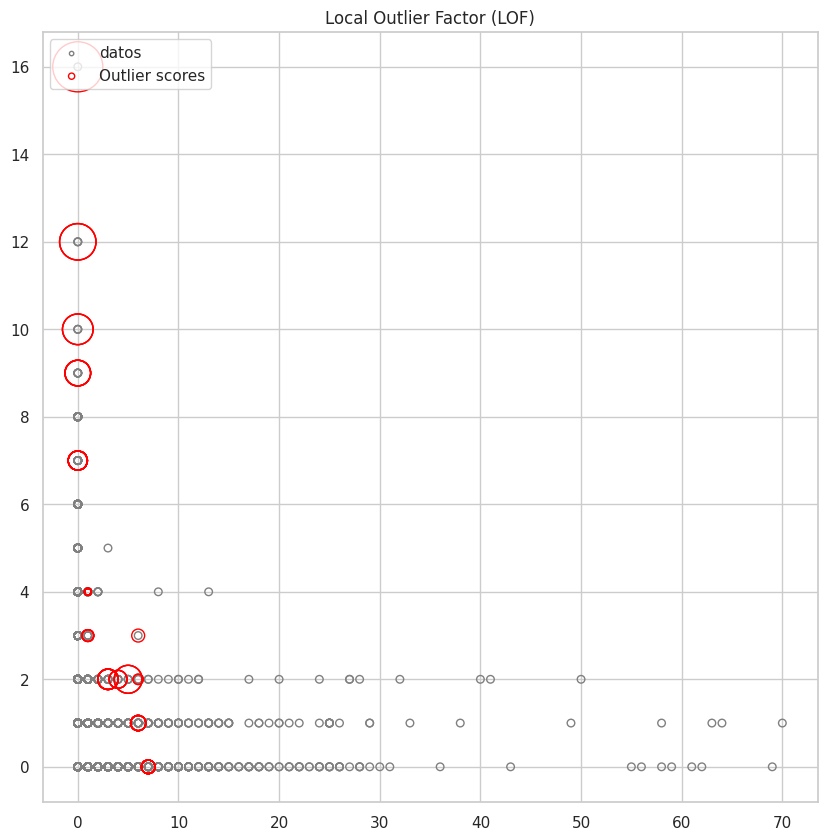

In [ ]:
#Calculo radio para plotear scores
radius = (hoteles_tr.scores.max() - hoteles_tr.scores) / (hoteles_tr.scores.max() - hoteles_tr.scores.min())

#Grafico LOF
plt.figure(figsize=(10,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(hoteles_tr.previous_bookings_not_canceled.values,hoteles_tr.stays_in_weekend_nights.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(hoteles_tr.previous_bookings_not_canceled.values,hoteles_tr.stays_in_weekend_nights.values, s=1300 * radius, edgecolors='red',facecolors='none', label='Outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
hoteles_tr.head()